# Bike Sharing Dataset Preprocessing



# Table of Contents

## 1. Data Preprocessing & Feature Engineering
- 1.1 Setup and Imports
- 1.2 Create Data Directory
- 1.3 Load OpenML Bike Sharing Dataset
- 1.4 Data Exploring - Pre Processing
- 1.5 Create Datetime Index
- 1.6 Create Time-Based Features
- 1.7 Encode Cyclic Features
- 1.8 One-Hot Encode Categorical Features
- 1.9 Drop Unnecessary Columns
- 1.10 Handle Missing Values and Remove Outliers
- 1.11 Save Cleaned Full Dataset
- 1.12 Feature Engineering (Lag, Rolling, Interactions)
- 1.13 Split Data by Year
- 1.14 Prepare and Save Train/Test Splits
- 1.15 Generate Data Summary

## 2. Linear Regression Baseline Model
- 2.1 Setup and Imports
- 2.2 Check Directories
- 2.3 Load Data
- 2.4 Build Pipeline with StandardScaler and LinearRegression
- 2.5 Set Up TimeSeriesSplit Cross-Validation
- 2.6 Define Hyperparameter Grid
- 2.7 Run GridSearchCV
- 2.8 Display Cross-Validation Results
- 2.9 Get Best Model and Evaluate on Test Set
- 2.10 Save Model and Metrics
- 2.11 Plot Actual vs Predicted
- 2.12 Plot Residuals Histogram
- 2.13 Feature Coefficients Analysis

## 3. Random Forest Regression Model
- 3.1 Setup and Imports
- 3.2 Create Directories
- 3.3 Load Data
- 3.4 Set Up TimeSeriesSplit Cross-Validation
- 3.5 Define Hyperparameter Grid for RandomizedSearchCV
- 3.6 Create and Run RandomizedSearchCV
- 3.7 Display Cross-Validation Results
- 3.8 Get Best Model and Evaluate on Test Set
- 3.9 Save Model and Metrics
- 3.10 Feature Importance Analysis
- 3.11 SHAP Analysis - Initialize Explainer
- 3.12 SHAP Summary Plot
- 3.13 Save Predictions to CSV

## 4. XGBoost Regression Model
- 4.1 Setup and Imports
- 4.2 Create Directories
- 4.3 Load Data
- 4.4 Set Up TimeSeriesSplit Cross-Validation
- 4.5 Define Hyperparameter Grid for RandomizedSearchCV
- 4.6 Create and Run RandomizedSearchCV
- 4.7 Display Cross-Validation Results
- 4.8 Get Best Model and Evaluate on Test Set
- 4.9 Save Model and Metrics
- 4.10 Plot Actual vs Predicted
- 4.11 Plot Residuals
- 4.12 SHAP Analysis - Initialize Explainer
- 4.13 Save Predictions to CSV

## 5. Multi-Layer Perceptron (Neural Network)
- 5.1 Setup and Imports
- 5.2 Create Directories
- 5.3 Load Data
- 5.4 Build Pipeline with StandardScaler and MLPRegressor
- 5.5 Set Up TimeSeriesSplit Cross-Validation
- 5.6 Define Hyperparameter Grid for RandomizedSearchCV
- 5.7 Run RandomizedSearchCV
- 5.8 Display Cross-Validation Results
- 5.9 Get Best Model and Evaluate on Test Set
- 5.10 Save Model and Metrics
- 5.11 Plotting Training History
- 5.12 Plot Residuals
- 5.13 Save Predictions to CSV

## 6. Model Comparison
- 6.1 Non-Tuned Baseline Models (Default Hyperparameters)
- 6.2 Impact of Feature Engineering (Original Features vs Engineered Features)
- 6.3 Tuned vs Basic Model Comparison

## 1.1 Setup and Imports

In [175]:
%pip install shap


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [176]:
!pip3 install xgboost==2.0.3 --break-system-packages

In [177]:
!brew install libomp

==> Auto-updating Homebrew...
Adjust how often this is run with `$HOMEBREW_AUTO_UPDATE_SECS` or disable with
`$HOMEBREW_NO_AUTO_UPDATE=1`. Hide these hints with `$HOMEBREW_NO_ENV_HINTS=1` (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
vibecheck: AI-powered git commit assistant written in Go
xcp: Fast & lightweight command-line tool for managing Xcode projects, built in Swift
==> New Casks
antigravity: AI Coding Agent IDE
chatglm: Desktop client for the ChatGLM AI chatbot
daruma: Track your goals using the Daruma Method
filo: AI-powered email client designed for Gmail
meituxiuxiu: Photo editing and beautification software
sodamusic: Music app
taobao: Online Shopping Client
white-rabbit: SVG utility and optimiser

You have 106 outdated formulae installed.

To reinstall 21.1.5, run:
  brew reinstall libomp


In [178]:
!pip3 install --upgrade shap --break-system-packages


In [179]:
import pandas as pd
import numpy as np
import json
from sklearn.datasets import fetch_openml
import os
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 1.2 Create Data Directory

In [180]:
os.makedirs('data', exist_ok=True)

## 1.3 Load OpenML Bike Sharing Dataset

In [181]:
bike_data = fetch_openml(data_id=42712, as_frame=True, parser='auto')
df = bike_data.frame.copy()
print(f"   ✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"   ✓ Columns: {df.columns.tolist()}")

df.head()

   ✓ Dataset loaded: 17379 rows, 13 columns
   ✓ Columns: ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'feel_temp', 'humidity', 'windspeed', 'count']


,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0,1


## 1.4 Data Exploring - Pre Processing

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('results', exist_ok=True)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('whitegrid')

df_plot = df.copy()

# Makes sure categorical columns are strings for plotting
for cat_col in ['season', 'weather', 'holiday', 'workingday']: 
    if cat_col in df_plot.columns:
        df_plot[cat_col] = df_plot[cat_col].astype(str)

# 1. Histogram of hourly demand
if 'count' in df_plot.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(df_plot['count'], bins=40, kde=True, color='dodgerblue', ax=ax)
    ax.set_title('Distribution of Hourly Rental Count', fontsize=14, fontweight='bold')
    ax.set_xlabel('Rental Count', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    fig.savefig('results/raw_explore_count_distribution.png', dpi=300, bbox_inches='tight')
    plt.close(fig)

# 2. Average demand by hour of day
if {'hour', 'count'}.issubset(df_plot.columns):
    hourly_profile = df_plot.groupby('hour')['count'].mean()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(hourly_profile.index, hourly_profile.values, marker='o', linewidth=1.5, color='steelblue')
    ax.set_title('Average Rentals by Hour of Day', fontsize=14, fontweight='bold')
    ax.set_xlabel('Hour', fontsize=12, fontweight='bold')
    ax.set_ylabel('Average Rental Count', fontsize=12, fontweight='bold')
    ax.set_xticks(range(0, 24, 2))
    ax.grid(True, alpha=0.3)
    fig.savefig('results/raw_explore_hourly_profile.png', dpi=300, bbox_inches='tight')
    plt.close(fig)


# 4. Scatter of temperature vs demand
if {'temp', 'count'}.issubset(df_plot.columns):
    fig, ax = plt.subplots(figsize=(9, 6))
    hue_col = 'weather' if 'weather' in df_plot.columns else None
    sns.scatterplot(data=df_plot, x='temp', y='count', hue=hue_col, palette='viridis', alpha=0.4, ax=ax, edgecolor=None)
    ax.set_title('Temperature vs Rental Count', fontsize=14, fontweight='bold')
    ax.set_xlabel('Normalised Temperature', fontsize=12, fontweight='bold')
    ax.set_ylabel('Rental Count', fontsize=12, fontweight='bold')
    if hue_col is None and ax.get_legend() is not None:
        ax.get_legend().remove()
    ax.grid(True, alpha=0.3)
    fig.savefig('results/raw_explore_temp_scatter.png', dpi=300, bbox_inches='tight')
    plt.close(fig)

# 5. Correlation heatmap for numeric raw features
numeric_cols = df_plot.select_dtypes(include=[np.number]).columns
if len(numeric_cols) >= 2:
    corr_matrix = df_plot[numeric_cols].corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax)
    ax.set_title('Correlation Heatmap (Raw Features)', fontsize=14, fontweight='bold')
    fig.savefig('results/raw_explore_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close(fig)



## 1.4 Create Datetime Index

In [183]:

# Convert year (0=2011, 1=2012) to actual year
df['actual_year'] = df['year'] + 2011

# Create a day column (assume sequential days starting from Jan 1)
# Group by year, month, hour to assign sequential days
df['day'] = 1  # placeholder
for yr in df['year'].unique():
    for m in df['month'].unique():
        mask = (df['year'] == yr) & (df['month'] == m)
        if mask.any():
            # Count hours in this month and assign days
            hours_in_month = mask.sum()
            days = [(i // 24) + 1 for i in range(hours_in_month)]
            df.loc[mask, 'day'] = days[:mask.sum()]

# Create datetime from components
df['datetime'] = pd.to_datetime(
    df[['actual_year', 'month', 'day', 'hour']].rename(
        columns={'actual_year': 'year', 'month': 'month', 'day': 'day', 'hour': 'hour'}
    )
)
df = df.set_index('datetime')
print(f"   ✓ Datetime index set: {df.index.min()} to {df.index.max()}")

df.info()

   ✓ Datetime index set: 2011-01-01 00:00:00 to 2012-12-31 23:00:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       17379 non-null  category
 1   year         17379 non-null  int64   
 2   month        17379 non-null  int64   
 3   hour         17379 non-null  int64   
 4   holiday      17379 non-null  category
 5   weekday      17379 non-null  int64   
 6   workingday   17379 non-null  category
 7   weather      17379 non-null  category
 8   temp         17379 non-null  float64 
 9   feel_temp    17379 non-null  float64 
 10  humidity     17379 non-null  float64 
 11  windspeed    17379 non-null  float64 
 12  count        17379 non-null  int64   
 13  actual_year  17379 non-null  int64   
 14  day          17379 non-null  int64   
dtypes: category(4), float64(4), int64(7)
memory usage: 1

## 1.5 Create Time-Based Features

In [184]:

# Renaming 'weekday' to 'dayofweek' for consistency
if 'weekday' in df.columns:
    df['dayofweek'] = df['weekday']
else:
    df['dayofweek'] = df.index.dayofweek

df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

if 'holiday' in df.columns:
    # Convert categorical to int 
    df['is_holiday'] = (df['holiday'] == 'yes').astype(int) if df['holiday'].dtype.name == 'category' else df['holiday'].astype(int)
else:
    df['is_holiday'] = 0

if 'workingday' in df.columns:
    df['workingday'] = (df['workingday'] == 'yes').astype(int) if df['workingday'].dtype.name == 'category' else df['workingday'].astype(int)
else:
    df['workingday'] = ((df['is_weekend'] == 0) & (df['is_holiday'] == 0)).astype(int)

print(f"   ✓ Created/Updated features: dayofweek, is_weekend, is_holiday, workingday")

df[['dayofweek', 'is_weekend', 'is_holiday', 'workingday']].head(10)

   ✓ Created/Updated features: dayofweek, is_weekend, is_holiday, workingday


,dayofweek,is_weekend,is_holiday,workingday
datetime,,,,
2011-01-01 00:00:00,6,1,0,0
2011-01-01 01:00:00,6,1,0,0
2011-01-01 02:00:00,6,1,0,0
2011-01-01 03:00:00,6,1,0,0
2011-01-01 04:00:00,6,1,0,0
2011-01-01 05:00:00,6,1,0,0
2011-01-01 06:00:00,6,1,0,0
2011-01-01 07:00:00,6,1,0,0
2011-01-01 08:00:00,6,1,0,0


## 1.6 Encode Cyclic Features

In [185]:

# Hour: 0-23 (24 hours)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Month: 1-12 (12 months)
df['month_sin'] = np.sin(2 * np.pi * (df['month'] - 1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df['month'] - 1) / 12)

print(f"   ✓ Created cyclic features: hour_sin, hour_cos, month_sin, month_cos")

df[['hour', 'hour_sin', 'hour_cos', 'month', 'month_sin', 'month_cos']].head(10)

   ✓ Created cyclic features: hour_sin, hour_cos, month_sin, month_cos


,hour,hour_sin,hour_cos,month,month_sin,month_cos
datetime,,,,,,
2011-01-01 00:00:00,0,0.000000,1.000000e+00,1,0.0,1.0
2011-01-01 01:00:00,1,0.258819,9.659258e-01,1,0.0,1.0
2011-01-01 02:00:00,2,0.500000,8.660254e-01,1,0.0,1.0
2011-01-01 03:00:00,3,0.707107,7.071068e-01,1,0.0,1.0
2011-01-01 04:00:00,4,0.866025,5.000000e-01,1,0.0,1.0
2011-01-01 05:00:00,5,0.965926,2.588190e-01,1,0.0,1.0
2011-01-01 06:00:00,6,1.000000,6.123234e-17,1,0.0,1.0
2011-01-01 07:00:00,7,0.965926,-2.588190e-01,1,0.0,1.0
2011-01-01 08:00:00,8,0.866025,-5.000000e-01,1,0.0,1.0


## 1.7 One-Hot Encode Categorical Features

In [186]:

# Handle season
if 'season' in df.columns:
    df['season'] = df['season'].astype(str)
    season_dummies = pd.get_dummies(df['season'], prefix='season', drop_first=False)
    df = pd.concat([df, season_dummies], axis=1)
    print(f"   ✓ One-hot encoded 'season': {list(season_dummies.columns)}")

# Handle weather 
weather_col = 'weather' if 'weather' in df.columns else 'weathersit'
if weather_col in df.columns:
    df[weather_col] = df[weather_col].astype(str)
    weather_dummies = pd.get_dummies(df[weather_col], prefix='weather', drop_first=False)
    df = pd.concat([df, weather_dummies], axis=1)
    print(f"   ✓ One-hot encoded '{weather_col}': {list(weather_dummies.columns)}")

# Display sample of encoded features
encoded_cols = [col for col in df.columns if col.startswith('season_') or col.startswith('weather_')]
df[encoded_cols].head(10)

   ✓ One-hot encoded 'season': ['season_fall', 'season_spring', 'season_summer', 'season_winter']
   ✓ One-hot encoded 'weather': ['weather_clear', 'weather_heavy_rain', 'weather_misty', 'weather_rain']


,season_fall,season_spring,season_summer,season_winter,weather_clear,weather_heavy_rain,weather_misty,weather_rain
datetime,,,,,,,,
2011-01-01 00:00:00,False,True,False,False,True,False,False,False
2011-01-01 01:00:00,False,True,False,False,True,False,False,False
2011-01-01 02:00:00,False,True,False,False,True,False,False,False
2011-01-01 03:00:00,False,True,False,False,True,False,False,False
2011-01-01 04:00:00,False,True,False,False,True,False,False,False
2011-01-01 05:00:00,False,True,False,False,False,False,True,False
2011-01-01 06:00:00,False,True,False,False,True,False,False,False
2011-01-01 07:00:00,False,True,False,False,True,False,False,False
2011-01-01 08:00:00,False,True,False,False,True,False,False,False


## 1.8. Drop Unnecessary Columns

In [187]:

# Columns to drop: instant, casual, registered (if exist), original season, weather, holiday, hour, month
columns_to_drop = ['instant', 'casual', 'registered', 'season', 'weather', 'weathersit',
                   'holiday', 'hour', 'month', 'weekday', 'actual_year', 'day']

columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)
print(f"   ✓ Dropped columns: {columns_to_drop}")

print(f"\nRemaining columns ({len(df.columns)}): {df.columns.tolist()}")

   ✓ Dropped columns: ['season', 'weather', 'holiday', 'hour', 'month', 'weekday', 'actual_year', 'day']

Remaining columns (22): ['year', 'workingday', 'temp', 'feel_temp', 'humidity', 'windspeed', 'count', 'dayofweek', 'is_weekend', 'is_holiday', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weather_clear', 'weather_heavy_rain', 'weather_misty', 'weather_rain']


## 1.9. Handle Missing Values and Remove Outliers

In [188]:

# find missing values
missing_before = df.isnull().sum().sum()
print(f"   • Missing values before: {missing_before}")

# Drop any rows with missing values
df = df.dropna()
missing_after = df.isnull().sum().sum()
print(f"   • Missing values after: {missing_after}")

# Rename 'count' to 'cnt'
if 'count' in df.columns and 'cnt' not in df.columns:
    df = df.rename(columns={'count': 'cnt'})

# Remove extreme outliers in 'cnt' by clipping at 99.5th percentile
if 'cnt' in df.columns:
    percentile_995 = df['cnt'].quantile(0.995)
    outliers_count = (df['cnt'] > percentile_995).sum()
    df['cnt'] = df['cnt'].clip(upper=percentile_995)
    print(f"   ✓ Clipped {outliers_count} outliers in 'cnt' at 99.5th percentile ({percentile_995:.2f})")

df['cnt'].describe()

   • Missing values before: 0
   • Missing values after: 0
   ✓ Clipped 87 outliers in 'cnt' at 99.5th percentile (835.22)


count    17379.000000
mean       189.231955
std        180.513215
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        835.220000
Name: cnt, dtype: float64

## 1.10. Save Cleaned Full Dataset

In [189]:
print("\n[8/13] Saving cleaned full dataframe...")
df.to_csv('data/clean_bike.csv')
print(f"   ✓ Saved to data/clean_bike.csv")
print(f"   ✓ Shape: {df.shape}")


[8/13] Saving cleaned full dataframe...
   ✓ Saved to data/clean_bike.csv
   ✓ Shape: (17379, 22)


## 1.11. Feature Engineering

In [190]:
#Check what columns
print(df.columns.tolist())

#Creating lag features
df['cnt_lag_1h'] = df['cnt'].shift(1)
df['cnt_lag_2h'] = df['cnt'].shift(2)
df['cnt_lag_3h'] = df['cnt'].shift(3)
df['cnt_lag_24h'] = df['cnt'].shift(24)
df['cnt_lag_168h'] = df['cnt'].shift(168)
df['cnt_lag_1d_mean'] = df['cnt'].shift(24).rolling(window=24).mean()
print(f"   Created 6 lag features")

#Create rolling statistics
df['cnt_rolling_mean_3h'] = df['cnt'].shift(1).rolling(window=3).mean()
df['cnt_rolling_mean_6h'] = df['cnt'].shift(1).rolling(window=6).mean()
df['cnt_rolling_mean_12h'] = df['cnt'].shift(1).rolling(window=12).mean()
df['cnt_rolling_mean_24h'] = df['cnt'].shift(1).rolling(window=24).mean()
df['cnt_rolling_std_24h'] = df['cnt'].shift(1).rolling(window=24).std()
df['cnt_rolling_min_24h'] = df['cnt'].shift(1).rolling(window=24).min()
df['cnt_rolling_max_24h'] = df['cnt'].shift(1).rolling(window=24).max()
print(f"   Created 7 rolling statistics")

# Create basic interaction features
# Temperature interactions to check if columns exist first
if 'temp' in df.columns:
    df['temp_squared'] = df['temp'] ** 2
if 'humidity' in df.columns:
    df['humidity_squared'] = df['humidity'] ** 2
elif 'hum' in df.columns:
    df['humidity_squared'] = df['hum'] ** 2

# Hour-based features if hour_sin/hour_cos exist
if 'hour_sin' in df.columns and 'hour_cos' in df.columns:
    # Create hour magnitude
    df['hour_magnitude'] = np.sqrt(df['hour_sin']**2 + df['hour_cos']**2)
    
print(f"   Created interaction features from available columns")

# Create weather-based features
print("\n[FE-4/6] Creating weather-based features...")
if 'temp' in df.columns:
    df['temp_comfort'] = 1 - np.abs(df['temp'] - 0.5)
if 'feel_temp' in df.columns and 'temp' in df.columns:
    df['temp_feel_diff'] = df['feel_temp'] - df['temp']
elif 'atemp' in df.columns and 'temp' in df.columns:
    df['temp_feel_diff'] = df['atemp'] - df['temp']

# Humidity extremes
if 'humidity' in df.columns:
    df['is_high_humidity'] = (df['humidity'] > 0.7).astype(int)
    df['is_low_humidity'] = (df['humidity'] < 0.3).astype(int)
elif 'hum' in df.columns:
    df['is_high_humidity'] = (df['hum'] > 0.7).astype(int)
    df['is_low_humidity'] = (df['hum'] < 0.3).astype(int)

print(f"   Created weather-based features")

# Handle missing values from lag features
print("\n[FE-5/6] Handling missing values from lag/rolling features...")
rows_before = len(df)
df = df.dropna()
rows_after = len(df)
print(f"   Removed {rows_before - rows_after} rows with NaN values")
print(f"   Remaining: {rows_after} samples")

# Create new train/test split with engineered features
X = df.drop('cnt', axis=1)
y = df['cnt']

split_idx = int(len(X) * 0.7)
X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

print(f"    Training set: {X_train.shape[0]} samples × {X_train.shape[1]} features")
print(f"    Test set: {X_test.shape[0]} samples × {X_test.shape[1]} features")

print(f"   Original features: 20")
print(f"   New features: {X_train.shape[1]}")
print(f"   Features added: {X_train.shape[1] - 20}")

['year', 'workingday', 'temp', 'feel_temp', 'humidity', 'windspeed', 'cnt', 'dayofweek', 'is_weekend', 'is_holiday', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weather_clear', 'weather_heavy_rain', 'weather_misty', 'weather_rain']
   Created 6 lag features
   Created 7 rolling statistics
   Created interaction features from available columns

[FE-4/6] Creating weather-based features...
   Created weather-based features

[FE-5/6] Handling missing values from lag/rolling features...
   Removed 168 rows with NaN values
   Remaining: 17211 samples
    Training set: 12047 samples × 41 features
    Test set: 5164 samples × 41 features
   Original features: 20
   New features: 41
   Features added: 21


In [191]:
corr_features = [
    'cnt', 'temp', 'feel_temp', 'humidity', 'windspeed',
     'is_weekend', 'cnt_lag_1h', 'cnt_lag_24h', 'cnt_rolling_mean_6h'
]

existing_features = [feat for feat in corr_features if feat in df.columns]

if len(existing_features) >= 2:
    corr_matrix = df[existing_features].corr()
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    sns.heatmap(
        corr_matrix, 
        cmap='coolwarm', 
        annot=True, 
        fmt='.2f', 
        linewidths=0.5, 
        linecolor='white',
        square=True,  
        cbar_kws={'shrink': 0.8},  
        ax=ax
    )
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    
    ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    
    fig.savefig('results/lag_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close(fig)
else:
    print(f"Not enough features found. Only found: {existing_features}")

## 1.11. Split Data by Year

In [192]:
# Sort by datetime index to ensure temporal order
df = df.sort_index()

# Calculate 70% cutoff point
cutoff_idx = int(len(df) * 0.7)
cutoff_date = df.index[cutoff_idx]

# Split data temporally
train_df = df.iloc[:cutoff_idx].copy()  # First 70%
test_df = df.iloc[cutoff_idx:].copy()   # Last 30%

print(f"   Cutoff date: {cutoff_date}")
print(f"   Train set: {train_df.shape[0]} rows ({len(train_df)/len(df)*100:.1f}%)")
print(f"   Test set: {test_df.shape[0]} rows ({len(test_df)/len(df)*100:.1f}%)")
print(f"   Train date range: {train_df.index.min()} to {train_df.index.max()}")
print(f"   Test date range: {test_df.index.min()} to {test_df.index.max()}")

print(f"\nTrain set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

   Cutoff date: 2012-05-29 04:00:00
   Train set: 12047 rows (70.0%)
   Test set: 5164 rows (30.0%)
   Train date range: 2011-01-08 00:00:00 to 2012-05-29 03:00:00
   Test date range: 2012-05-29 04:00:00 to 2012-12-31 23:00:00

Train set shape: (12047, 42)
Test set shape: (5164, 42)


## 1.12. Prepare and Save Train/Test Splits

In [193]:
# Separate features (X) and target (y)
target_col = 'cnt'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataframe")

# RemovING target from features
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Also dropping 'year' from features to avoid data leakage
if 'year' in X_train.columns:
    X_train = X_train.drop(columns=['year'])
    X_test = X_test.drop(columns=['year'])

# Save to CSV
X_train.to_csv('data/X_train.csv')
y_train.to_csv('data/y_train.csv', header=True)
X_test.to_csv('data/X_test.csv')
y_test.to_csv('data/y_test.csv', header=True)

## 1.13. Generate Data Summary

In [194]:
summary = {
    "full_dataset": {
        "shape": list(df.shape),
        "missing_values": int(df.isnull().sum().sum()),
        "cnt_statistics": {
            "mean": float(df['cnt'].mean()),
            "std": float(df['cnt'].std()),
            "min": float(df['cnt'].min()),
            "25th_percentile": float(df['cnt'].quantile(0.25)),
            "50th_percentile": float(df['cnt'].quantile(0.50)),
            "75th_percentile": float(df['cnt'].quantile(0.75)),
            "95th_percentile": float(df['cnt'].quantile(0.95)),
            "99th_percentile": float(df['cnt'].quantile(0.99)),
            "99.5th_percentile": float(df['cnt'].quantile(0.995)),
            "max": float(df['cnt'].max())
        }
    },
    "train_set": {
        "X_shape": list(X_train.shape),
        "y_shape": list(y_train.shape),
        "missing_values_X": int(X_train.isnull().sum().sum()),
        "missing_values_y": int(y_train.isnull().sum()),
        "cnt_statistics": {
            "mean": float(y_train.mean()),
            "std": float(y_train.std()),
            "min": float(y_train.min()),
            "max": float(y_train.max())
        }
    },
    "test_set": {
        "X_shape": list(X_test.shape),
        "y_shape": list(y_test.shape),
        "missing_values_X": int(X_test.isnull().sum().sum()),
        "missing_values_y": int(y_test.isnull().sum()),
        "cnt_statistics": {
            "mean": float(y_test.mean()),
            "std": float(y_test.std()),
            "min": float(y_test.min()),
            "max": float(y_test.max())
        }
    },
    "features": list(X_train.columns),
    "random_state": RANDOM_STATE
}

with open('data/data_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)
    
print(f"  Saved data_summary.json")

print(json.dumps(summary, indent=2))

  Saved data_summary.json
{
  "full_dataset": {
    "shape": [
      17211,
      42
    ],
    "missing_values": 0,
    "cnt_statistics": {
      "mean": 190.52798442856314,
      "std": 180.8421456277108,
      "min": 1.0,
      "25th_percentile": 41.0,
      "50th_percentile": 144.0,
      "75th_percentile": 282.0,
      "95th_percentile": 564.0,
      "99th_percentile": 783.0,
      "99.5th_percentile": 835.2090000000013,
      "max": 835.2200000000012
    }
  },
  "train_set": {
    "X_shape": [
      12047,
      40
    ],
    "y_shape": [
      12047
    ],
    "missing_values_X": 0,
    "missing_values_y": 0,
    "cnt_statistics": {
      "mean": 161.7313106997593,
      "std": 153.31742086023127,
      "min": 1.0,
      "max": 835.2200000000012
    }
  },
  "test_set": {
    "X_shape": [
      5164,
      40
    ],
    "y_shape": [
      5164
    ],
    "missing_values_X": 0,
    "missing_values_y": 0,
    "cnt_statistics": {
      "mean": 257.7072114639814,
      "std": 218.4

# Linear Regression Baseline Model


- StandardScaler for feature scaling
- LinearRegression and Ridge regression
- TimeSeriesSplit cross-validation
- GridSearchCV for hyperparameter tuning

## 2.2. Check Directories

In [195]:
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

## 2.3. Load Data

In [196]:

# Loading training data
X_train = pd.read_csv('data/X_train.csv', index_col=0)
y_train = pd.read_csv('data/y_train.csv', index_col=0).squeeze()

# Loading test data
X_test = pd.read_csv('data/X_test.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0).squeeze()

print(f"    X_train shape: {X_train.shape}")
print(f"    y_train shape: {y_train.shape}")
print(f"    X_test shape: {X_test.shape}")
print(f"    y_test shape: {y_test.shape}")

# Display feature names
print(f"\n   Features ({len(X_train.columns)}):")
for i, col in enumerate(X_train.columns, 1):
    print(f"   {i:2d}. {col}")

# Display first few rows
X_train.head()

    X_train shape: (12047, 40)
    y_train shape: (12047,)
    X_test shape: (5164, 40)
    y_test shape: (5164,)

   Features (40):
    1. workingday
    2. temp
    3. feel_temp
    4. humidity
    5. windspeed
    6. dayofweek
    7. is_weekend
    8. is_holiday
    9. hour_sin
   10. hour_cos
   11. month_sin
   12. month_cos
   13. season_fall
   14. season_spring
   15. season_summer
   16. season_winter
   17. weather_clear
   18. weather_heavy_rain
   19. weather_misty
   20. weather_rain
   21. cnt_lag_1h
   22. cnt_lag_2h
   23. cnt_lag_3h
   24. cnt_lag_24h
   25. cnt_lag_168h
   26. cnt_lag_1d_mean
   27. cnt_rolling_mean_3h
   28. cnt_rolling_mean_6h
   29. cnt_rolling_mean_12h
   30. cnt_rolling_mean_24h
   31. cnt_rolling_std_24h
   32. cnt_rolling_min_24h
   33. cnt_rolling_max_24h
   34. temp_squared
   35. humidity_squared
   36. hour_magnitude
   37. temp_comfort
   38. temp_feel_diff
   39. is_high_humidity
   40. is_low_humidity


,workingday,temp,feel_temp,humidity,windspeed,dayofweek,is_weekend,is_holiday,hour_sin,hour_cos,...,cnt_rolling_std_24h,cnt_rolling_min_24h,cnt_rolling_max_24h,temp_squared,humidity_squared,hour_magnitude,temp_comfort,temp_feel_diff,is_high_humidity,is_low_humidity
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-08 00:00:00,0,4.10,3.790,0.42,26.0027,0,0,0,0.000000,1.000000,...,32.256417,1.0,102.0,16.8100,0.1764,1.0,-2.60,-0.310,0,0
2011-01-08 01:00:00,0,4.10,3.030,0.42,31.0009,0,0,0,0.258819,0.965926,...,32.256417,1.0,102.0,16.8100,0.1764,1.0,-2.60,-1.070,0,0
2011-01-08 02:00:00,0,4.10,3.030,0.46,31.0009,0,0,0,0.500000,0.866025,...,32.395624,1.0,102.0,16.8100,0.2116,1.0,-2.60,-1.070,0,0
2011-01-08 03:00:00,0,4.10,3.790,0.46,27.9993,0,0,0,0.707107,0.707107,...,32.570881,1.0,102.0,16.8100,0.2116,1.0,-2.60,-0.310,0,0
2011-01-08 04:00:00,0,3.28,4.545,0.53,12.9980,0,0,0,0.866025,0.500000,...,32.706839,1.0,102.0,10.7584,0.2809,1.0,-1.78,1.265,0,0


## 2.4. Build Pipeline with StandardScaler and LinearRegression

In [197]:
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


print(f"\n   Pipeline steps: {pipeline.steps}")


   Pipeline steps: [('scaler', StandardScaler()), ('regressor', LinearRegression())]


## 2.5. Set Up TimeSeriesSplit Cross-Validation

In [198]:
# Creating TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

print(f"   ✓ 5 splits for cross-validation")

# Visualize the splits
print("\n   Split information:")
for i, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
    print(f"   Split {i}: Train size={len(train_idx):5d}, Validation size={len(val_idx):5d}")

   ✓ 5 splits for cross-validation

   Split information:
   Split 1: Train size= 2012, Validation size= 2007
   Split 2: Train size= 4019, Validation size= 2007
   Split 3: Train size= 6026, Validation size= 2007
   Split 4: Train size= 8033, Validation size= 2007
   Split 5: Train size=10040, Validation size= 2007


## 2.6. Define Hyperparameter Grid

In [199]:
# Comparing LinearRegression with different settings and Ridge with different alpha values
param_grid = [
    {
        'regressor': [LinearRegression()],
        'regressor__fit_intercept': [True, False]
    },
    {
        'regressor': [Ridge(random_state=RANDOM_STATE, solver='lbfgs', max_iter=10000)],
        'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'regressor__fit_intercept': [True, False]
    }
]

print("   ✓ Parameter grid defined:")
print("      - LinearRegression: fit_intercept=[True, False]")
print("      - Ridge: alpha=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], fit_intercept=[True, False]")

   ✓ Parameter grid defined:
      - LinearRegression: fit_intercept=[True, False]
      - Ridge: alpha=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], fit_intercept=[True, False]


## 2.7. Run GridSearchCV

In [200]:
# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',  # Using MAE as the primary metric
    n_jobs=-1,  
    verbose=2,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print(f"\n   Best parameters: {grid_search.best_params_}")
print(f"   Best cross-validation MAE: {-grid_search.best_score_:.4f}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END regressor=LinearRegression(), regressor__fit_intercept=True; total time=   0.1s
[CV] END regressor=LinearRegression(), regressor__fit_intercept=False; total time=   0.1s
[CV] END regressor=LinearRegression(), regressor__fit_intercept=False; total time=   0.0s
[CV] END regressor=LinearRegression(), regressor__fit_intercept=True; total time=   0.0s
[CV] END regressor=LinearRegression(), regressor__fit_intercept=True; total time=   0.1s
[CV] END regressor=LinearRegression(), regressor__fit_intercept=False; total time=   0.1s
[CV] END regressor=LinearRegression(), regressor__fit_intercept=True; total time=   0.1s
[CV] END regressor=LinearRegression(), regressor__fit_intercept=True; total time=   0.1s
[CV] END regressor=Ridge(max_iter=10000, random_state=42, solver='lbfgs'), regressor__alpha=0.001, regressor__fit_intercept=True; total time=   0.0s
[CV] END regressor=Ridge(max_iter=10000, random_state=42, solver='lbfgs'), 

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/ho

## 2.8. Display Cross-Validation Results

In [201]:
# Create DataFrame with CV results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Select and display relevant columns
results_display = cv_results[[
    'params', 
    'mean_train_score', 
    'std_train_score',
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'
]].copy()

# Convert negative MAE to positive
results_display['mean_train_MAE'] = -results_display['mean_train_score']
results_display['mean_val_MAE'] = -results_display['mean_test_score']
results_display['std_val_MAE'] = results_display['std_test_score']

# Sort by rank and display top 2
results_display = results_display.sort_values('rank_test_score')
print("Top 2 models by validation MAE:")
display(results_display[['params', 'mean_train_MAE', 'mean_val_MAE', 'std_val_MAE', 'rank_test_score']].head(2))

Top 2 models by validation MAE:


,params,mean_train_MAE,mean_val_MAE,std_val_MAE,rank_test_score
0,"{'regressor': LinearRegression(), 'regressor__...",31.655778,42.749403,6.595766,1
1,"{'regressor': LinearRegression(), 'regressor__...",128.033762,135.540845,24.141625,2


## 2.9. Get Best Model and Evaluate on Test Set

In [202]:
# Get best model
best_model = grid_search.best_estimator_

# Make predictions on test set
y_pred_test = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("   Test Set Performance:")
print(f"   Mean Absolute Error (MAE):  {mae:8.4f}")
print(f"   Root Mean Squared Error (RMSE): {rmse:8.4f}")
print(f"   R² Score:                       {r2:8.4f}")

# Also get predictions on training set for comparison
y_pred_train = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

print("\n   Training Set Performance:")
print(f"   Mean Absolute Error (MAE):  {train_mae:8.4f}")
print(f"   Root Mean Squared Error (RMSE): {train_rmse:8.4f}")
print(f"   R² Score:                       {train_r2:8.4f}")

   Test Set Performance:
   Mean Absolute Error (MAE):   53.6754
   Root Mean Squared Error (RMSE):  79.2649
   R² Score:                         0.8683

   Training Set Performance:
   Mean Absolute Error (MAE):   38.3479
   Root Mean Squared Error (RMSE):  57.3863
   R² Score:                         0.8599


## 2.10. Save Model and Metrics

In [203]:
# Save model
model_path = 'models/linear_baseline.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"   Model saved to {model_path}")

# Convert best_params to JSON-serializable format
best_params_serializable = {}
for key, value in grid_search.best_params_.items():
    if hasattr(value, '__class__'):
        # Convert sklearn objects to string representation
        best_params_serializable[key] = str(value)
    else:
        best_params_serializable[key] = value

# Prepare metrics dictionary
metrics = {
    "model_type": "Linear Regression Baseline",
    "best_params": best_params_serializable,
    "cross_validation": {
        "n_splits": 5,
        "cv_method": "TimeSeriesSplit",
        "best_cv_mae": float(-grid_search.best_score_)
    },
    "train_metrics": {
        "mae": float(train_mae),
        "rmse": float(train_rmse),
        "r2": float(train_r2)
    },
    "test_metrics": {
        "mae": float(mae),
        "rmse": float(rmse),
        "r2": float(r2)
    },
    "target_statistics": {
        "train_mean": float(y_train.mean()),
        "train_std": float(y_train.std()),
        "test_mean": float(y_test.mean()),
        "test_std": float(y_test.std())
    },
    "random_state": RANDOM_STATE
}

# Save metrics
metrics_path = 'results/linear_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=2)
print(f"   Metrics saved to {metrics_path}")

# Display saved metrics
print(json.dumps(metrics, indent=2))

   Model saved to models/linear_baseline.pkl
   Metrics saved to results/linear_metrics.json
{
  "model_type": "Linear Regression Baseline",
  "best_params": {
    "regressor": "LinearRegression()",
    "regressor__fit_intercept": "True"
  },
  "cross_validation": {
    "n_splits": 5,
    "cv_method": "TimeSeriesSplit",
    "best_cv_mae": 42.74940280169132
  },
  "train_metrics": {
    "mae": 38.347890152329214,
    "rmse": 57.38625448284218,
    "r2": 0.8598901069296745
  },
  "test_metrics": {
    "mae": 53.67544587586538,
    "rmse": 79.26486858581187,
    "r2": 0.8683144745197269
  },
  "target_statistics": {
    "train_mean": 161.7313106997593,
    "train_std": 153.31742086023127,
    "test_mean": 257.7072114639814,
    "test_std": 218.4508694950837
  },
  "random_state": 42
}


## 2.11. Plot Actual vs Predicted

   ✓ Plot saved to results/actual_vs_pred_linear.png


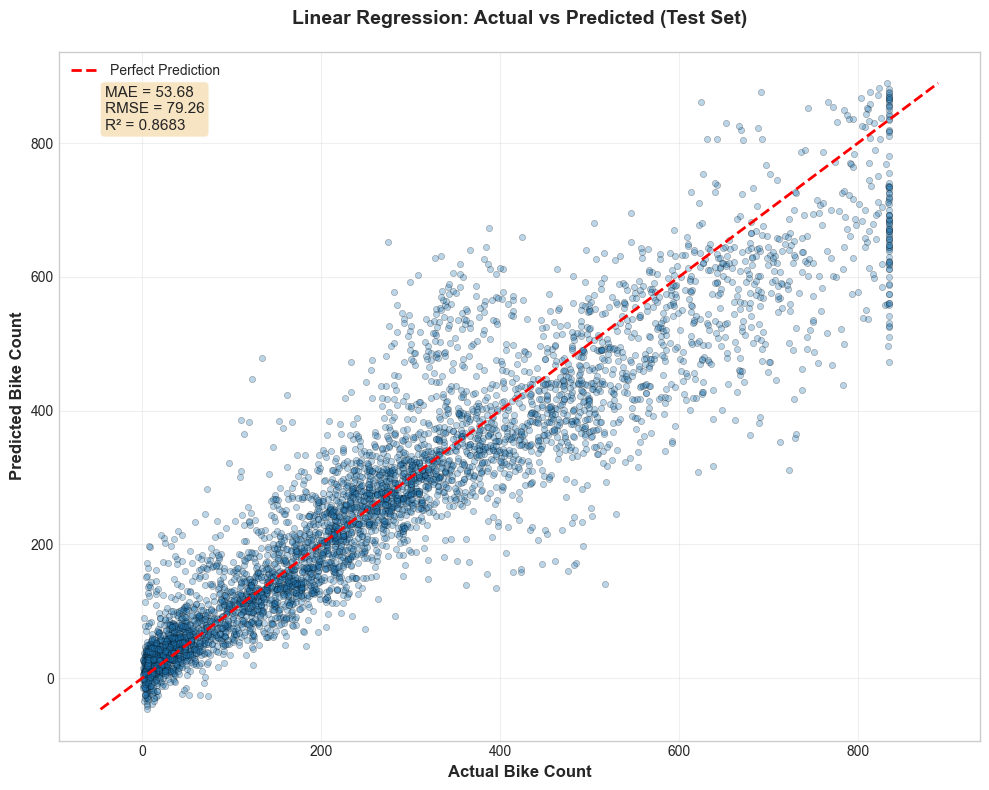

In [204]:
# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create scatter plot
ax.scatter(y_test, y_pred_test, alpha=0.3, s=20, edgecolors='k', linewidths=0.5)

# Add perfect prediction line
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Labels and title
ax.set_xlabel('Actual Bike Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Bike Count', fontsize=12, fontweight='bold')
ax.set_title('Linear Regression: Actual vs Predicted (Test Set)', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Add metrics text box
textstr = f'MAE = {mae:.2f}\nRMSE = {rmse:.2f}\nR² = {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()

# Save figure
plot_path = 'results/actual_vs_pred_linear.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Plot saved to {plot_path}")

plt.show()

## 2.12. Plot Residuals Histogram

   ✓ Plot saved to results/residuals_hist_linear.png


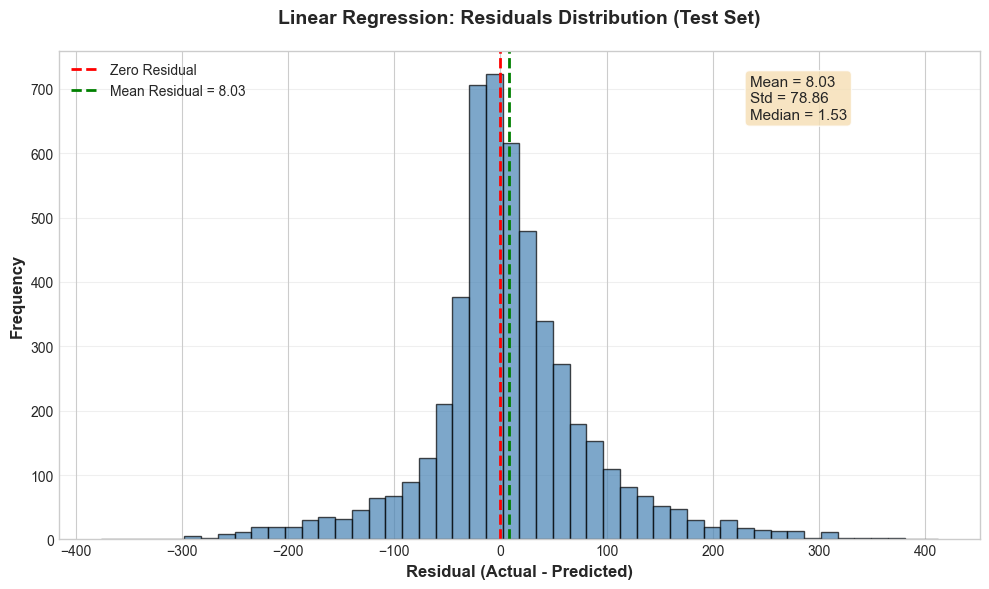

In [205]:
# Calculate residuals
residuals = y_test - y_pred_test

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram
ax.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')

# Add vertical line at zero
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')

# Add mean residual line
mean_residual = residuals.mean()
ax.axvline(x=mean_residual, color='green', linestyle='--', linewidth=2, 
           label=f'Mean Residual = {mean_residual:.2f}')

# Labels and title
ax.set_xlabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Linear Regression: Residuals Distribution (Test Set)', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Add statistics text box
textstr = f'Mean = {residuals.mean():.2f}\nStd = {residuals.std():.2f}\nMedian = {residuals.median():.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()

# Save figure
plot_path = 'results/residuals_hist_linear.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Plot saved to {plot_path}")

plt.show()

## 2.13. Feature Coefficients Analysis

   Top 10 Features by Absolute Coefficient Value:
   Rank   Feature                       Coefficient Abs_Coefficient
   1      cnt_lag_1h                     110.019432      110.019432
   2      cnt_lag_2h                     -70.395424       70.395424
   3      cnt_lag_24h                     38.167534       38.167534
   4      cnt_lag_168h                    30.268299       30.268299
   5      cnt_rolling_mean_6h            -29.054698       29.054698
   6      cnt_rolling_mean_3h             22.404569       22.404569
   7      cnt_lag_3h                      21.934480       21.934480
   8      hour_cos                       -12.821433       12.821433
   9      weather_rain                    -9.429256        9.429256
   10     cnt_rolling_mean_12h             9.119240        9.119240

   Intercept: 161.731311

   ✓ Feature coefficients plot saved to results/feature_coefficients_linear.png


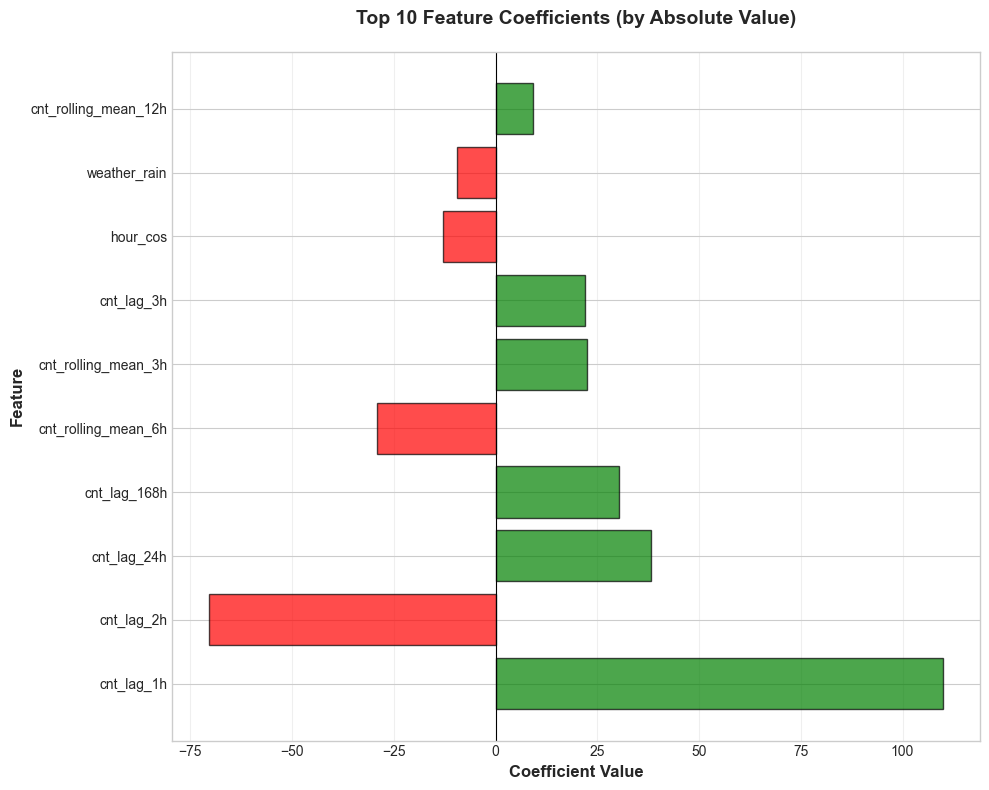

In [206]:

# Get the regressor from the pipeline
regressor = best_model.named_steps['regressor']

# Get coefficients
coefficients = regressor.coef_
feature_names = X_train.columns

# Create DataFrame with coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("   Top 10 Features by Absolute Coefficient Value:")
print("   " + "=" * 70)
print(f"   {'Rank':<6} {'Feature':<25} {'Coefficient':>15} {'Abs_Coefficient':>15}")
print("   " + "=" * 70)

for idx, (i, row) in enumerate(coef_df.head(10).iterrows(), 1):
    print(f"   {idx:<6} {row['Feature']:<25} {row['Coefficient']:>15.6f} {row['Abs_Coefficient']:>15.6f}")

print("   " + "=" * 70)

# Display intercept if exists
if hasattr(regressor, 'intercept_'):
    print(f"\n   Intercept: {regressor.intercept_:.6f}")



# Visualize top 10 coefficients
fig, ax = plt.subplots(figsize=(10, 8))
top_10 = coef_df.head(10)
colors = ['green' if x > 0 else 'red' for x in top_10['Coefficient']]
ax.barh(range(len(top_10)), top_10['Coefficient'], color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels(top_10['Feature'])
ax.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Feature Coefficients (by Absolute Value)', fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('results/feature_coefficients_linear.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Feature coefficients plot saved to results/feature_coefficients_linear.png")
plt.show()

# Random Forest Regression Model with SHAP Analysis

This notebook builds a Random Forest model for bike sharing demand prediction with:
- RandomForestRegressor (no scaling required)
- RandomizedSearchCV for hyperparameter tuning
- TimeSeriesSplit cross-validation
- SHAP for model interpretability

## 3.1. Setup and Imports

## 3.2. Create Directories

In [207]:
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

## 3.3. Load Data 

In [208]:

# Load training data
X_train = pd.read_csv('data/X_train.csv', index_col=0)
y_train = pd.read_csv('data/y_train.csv', index_col=0).squeeze()

# Load test data
X_test = pd.read_csv('data/X_test.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0).squeeze()

print(f"   ✓ X_train shape: {X_train.shape}")
print(f"   ✓ y_train shape: {y_train.shape}")
print(f"   ✓ X_test shape: {X_test.shape}")
print(f"   ✓ y_test shape: {y_test.shape}")

   ✓ X_train shape: (12047, 40)
   ✓ y_train shape: (12047,)
   ✓ X_test shape: (5164, 40)
   ✓ y_test shape: (5164,)


## 3.4. Set Up TimeSeriesSplit Cross-Validation

In [209]:
# Create TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)


# Visualize the splits
print("\n   Split information:")
for i, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
    print(f"   Split {i}: Train size={len(train_idx):5d}, Validation size={len(val_idx):5d}")


   Split information:
   Split 1: Train size= 2012, Validation size= 2007
   Split 2: Train size= 4019, Validation size= 2007
   Split 3: Train size= 6026, Validation size= 2007
   Split 4: Train size= 8033, Validation size= 2007
   Split 5: Train size=10040, Validation size= 2007


## 3.5. Define Hyperparameter Grid for RandomizedSearchCV

In [210]:
# Define parameter distributions
param_distributions = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5]
}

print("   ✓ Parameter ranges defined:")
for param, values in param_distributions.items():
    print(f"      - {param}: {values}")

# Calculate total combinations
total_combinations = 1
for values in param_distributions.values():
    total_combinations *= len(values)
print(f"\n   ✓ Total possible combinations: {total_combinations}")
print(f"   ✓ RandomizedSearchCV will sample a subset of these")

   ✓ Parameter ranges defined:
      - n_estimators: [100, 300, 500]
      - max_depth: [6, 10, 20, None]
      - min_samples_split: [2, 5, 10]
      - max_features: ['sqrt', 'log2', 0.5]

   ✓ Total possible combinations: 108
   ✓ RandomizedSearchCV will sample a subset of these


## 3.6. Create and Run RandomizedSearchCV

In [211]:
# Create Random Forest model
rf_model = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings to sample
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    random_state=RANDOM_STATE,
    return_train_score=True
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print(f"\n   Best parameters: {random_search.best_params_}")
print(f"   Best cross-validation MAE: {-random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=6, max_features=log2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=6, max_features=log2, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=6, max_features=log2, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=6, max_features=log2, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END max_depth=6, max_features=log2, min_samples_split=2, n_estimators=300; total time=   3.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=300; total time=   2.1s
[CV] END max_depth=20, max_features=0.5, min_samples_split=5, n_estimators=500; total time=   6.8s
[CV] END max_depth=6, max_features=sqrt, min_sa

## 3.7. Display Cross-Validation Results

In [212]:
# Create DataFrame with CV results
cv_results = pd.DataFrame(random_search.cv_results_)

# Select and display relevant columns
results_display = cv_results[[
    'params', 
    'mean_train_score', 
    'std_train_score',
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'
]].copy()

# Convert negative MAE to positive
results_display['mean_train_MAE'] = -results_display['mean_train_score']
results_display['mean_val_MAE'] = -results_display['mean_test_score']
results_display['std_val_MAE'] = results_display['std_test_score']

# Sort by rank and display top 5
results_display = results_display.sort_values('rank_test_score')
display(results_display[['params', 'mean_train_MAE', 'mean_val_MAE', 'std_val_MAE', 'rank_test_score']].head(5))

,params,mean_train_MAE,mean_val_MAE,std_val_MAE,rank_test_score
0,"{'n_estimators': 500, 'min_samples_split': 5, ...",7.518895,35.446822,13.591779,1
17,"{'n_estimators': 300, 'min_samples_split': 5, ...",7.527855,35.521934,13.613592,2
13,"{'n_estimators': 500, 'min_samples_split': 10,...",9.753900,35.698889,13.525054,3
18,"{'n_estimators': 300, 'min_samples_split': 10,...",9.733697,35.730939,13.572034,4
11,"{'n_estimators': 300, 'min_samples_split': 10,...",9.773849,35.833918,13.573047,5


## 3.8. Get Best Model and Evaluate on Test Set

In [213]:

# Get best model
best_rf_model = random_search.best_estimator_

# Make predictions on test set
y_pred_test = best_rf_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("   Test Set Performance:")
print(f"   Mean Absolute Error (MAE):  {mae:8.4f}")
print(f"   Root Mean Squared Error (RMSE): {rmse:8.4f}")
print(f"   R² Score:                       {r2:8.4f}")

# Also get predictions on training set for comparison
y_pred_train = best_rf_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

print("\n   Training Set Performance:")
print(f"   Mean Absolute Error (MAE):  {train_mae:8.4f}")
print(f"   Root Mean Squared Error (RMSE): {train_rmse:8.4f}")
print(f"   R² Score:                       {train_r2:8.4f}")

   Test Set Performance:
   Mean Absolute Error (MAE):   36.8725
   Root Mean Squared Error (RMSE):  58.1064
   R² Score:                         0.9292

   Training Set Performance:
   Mean Absolute Error (MAE):    8.6806
   Root Mean Squared Error (RMSE):  14.3991
   R² Score:                         0.9912


## 3.9. Save Model and Metrics

In [214]:
# Save model
model_path = 'models/rf_best.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_rf_model, f)
print(f"   ✓ Model saved to {model_path}")

# Prepare metrics dictionary
metrics = {
    "model_type": "Random Forest Regressor",
    "best_params": random_search.best_params_,
    "cross_validation": {
        "n_splits": 5,
        "cv_method": "TimeSeriesSplit",
        "best_cv_mae": float(-random_search.best_score_)
    },
    "train_metrics": {
        "mae": float(train_mae),
        "rmse": float(train_rmse),
        "r2": float(train_r2)
    },
    "test_metrics": {
        "mae": float(mae),
        "rmse": float(rmse),
        "r2": float(r2)
    },
    "target_statistics": {
        "train_mean": float(y_train.mean()),
        "train_std": float(y_train.std()),
        "test_mean": float(y_test.mean()),
        "test_std": float(y_test.std())
    },
    "random_state": RANDOM_STATE
}

# Save metrics
metrics_path = 'results/rf_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=2)
print(f"   ✓ Metrics saved to {metrics_path}")

   ✓ Model saved to models/rf_best.pkl
   ✓ Metrics saved to results/rf_metrics.json


## 3.10. Finding most important features

In [215]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

print("   Feature Importances:")
print("   " + "=" * 60)
print(f"   {'Rank':<6} {'Feature':<25} {'Importance':>15}")
print("   " + "=" * 60)

for idx, (i, row) in enumerate(importance_df.iterrows(), 1):
    print(f"   {idx:<6} {row['Feature']:<25} {row['Importance']:>15.6f}")

print("   " + "=" * 60)

# Save feature importances table
importance_df.to_csv('results/feature_importances_rf.csv', index=False)


   Feature Importances:
   Rank   Feature                        Importance
   1      cnt_lag_1h                       0.460225
   2      cnt_lag_24h                      0.176486
   3      cnt_lag_168h                     0.136680
   4      hour_cos                         0.051406
   5      cnt_rolling_mean_3h              0.039755
   6      hour_sin                         0.027656
   7      cnt_lag_2h                       0.017704
   8      cnt_lag_3h                       0.012698
   9      cnt_rolling_max_24h              0.011127
   10     cnt_rolling_mean_6h              0.008836
   11     cnt_rolling_mean_12h             0.008389
   12     cnt_rolling_mean_24h             0.005477
   13     cnt_rolling_std_24h              0.005295
   14     dayofweek                        0.005203
   15     weather_rain                     0.003839
   16     cnt_lag_1d_mean                  0.003398
   17     humidity                         0.002971
   18     humidity_squared              

## 3.12. SHAP Analysis - Initialize Explainer

In [216]:
# Create SHAP explainer for tree-based models
# Using a subset of test data for faster computation (first 1000 samples)
X_test_shap = X_test.head(1000)
y_test_shap = y_test.head(1000)

print(f"   Computing SHAP values for {len(X_test_shap)} test samples...")
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer(X_test_shap)

print(f"   ✓ SHAP values computed successfully")
print(f"   ✓ Shape of SHAP values: {shap_values.values.shape}")

   Computing SHAP values for 1000 test samples...
   ✓ SHAP values computed successfully
   ✓ Shape of SHAP values: (1000, 40)


## 3.13. SHAP Summary Plot

/var/folders/l6/7n445dpj3bj189pnvn43qhrm0000gn/T/ipykernel_15855/1673041624.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap, show=False)


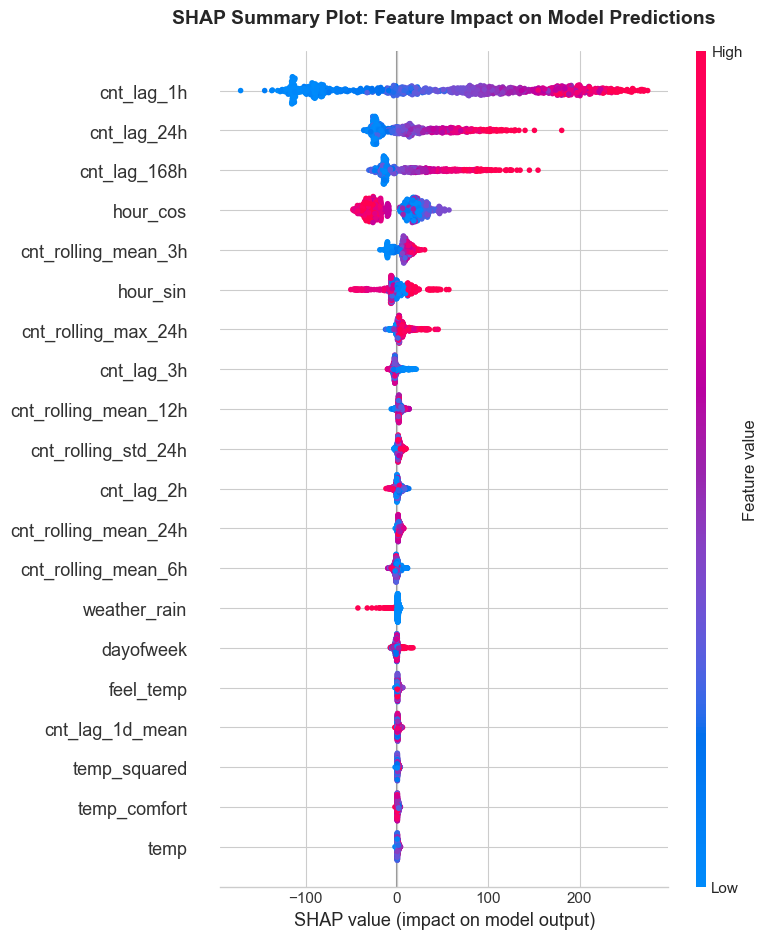

In [217]:
# SHAP Summary Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_shap, show=False)
plt.title('SHAP Summary Plot: Feature Impact on Model Predictions', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('results/shap_rf_summary.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.15. Save Predictions to CSV

In [218]:

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'index': X_test.index,
    'y_true': y_test.values,
    'y_pred': y_pred_test
})

# Save to CSV
predictions_path = 'results/rf_predictions.csv'
predictions_df.to_csv(predictions_path, index=False)
print(f"   ✓ Predictions saved to {predictions_path}")
print(f"   ✓ Shape: {predictions_df.shape}")

# Display first few rows
print("\n   First 10 predictions:")
display(predictions_df.head(10))

   ✓ Predictions saved to results/rf_predictions.csv
   ✓ Shape: (5164, 3)

   First 10 predictions:


,index,y_true,y_pred
0,2012-05-29 04:00:00,5.0,6.128732
1,2012-05-29 05:00:00,33.0,24.342653
2,2012-05-29 06:00:00,154.0,114.618802
3,2012-05-29 07:00:00,450.0,358.422048
4,2012-05-29 08:00:00,634.0,538.623671
5,2012-05-29 09:00:00,257.0,337.376013
6,2012-05-29 10:00:00,183.0,266.122783
7,2012-05-29 11:00:00,197.0,224.421285
8,2012-05-29 12:00:00,237.0,263.409758
9,2012-05-29 13:00:00,239.0,286.553211


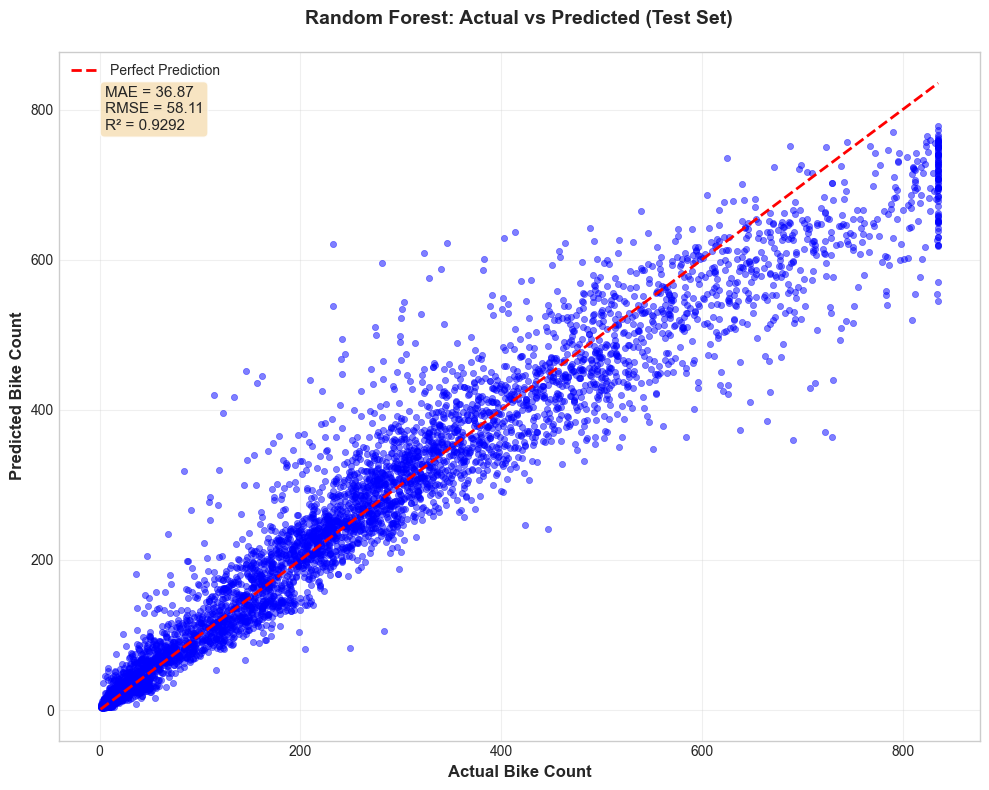

Random Forest Test Set Metrics:
  MAE: 36.87
  RMSE: 58.11
  R²: 0.9292


In [260]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Random Forest model
with open('models/rf_best.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_actual = y_test

# Calculate metrics
mae = mean_absolute_error(y_actual, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred_rf))
r2 = r2_score(y_actual, y_pred_rf)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot
ax.scatter(y_actual, y_pred_rf, alpha=0.5, s=20, color='blue', edgecolors='blue', linewidth=0.5)

# Perfect prediction line
min_val = min(y_actual.min(), y_pred_rf.min())
max_val = max(y_actual.max(), y_pred_rf.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Labels and title
ax.set_xlabel('Actual Bike Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Bike Count', fontsize=12, fontweight='bold')
ax.set_title('Random Forest: Actual vs Predicted (Test Set)', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Add metrics text box
textstr = f'MAE = {mae:.2f}\nRMSE = {rmse:.2f}\nR² = {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('results/rf_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Random Forest Test Set Metrics:")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.4f}")

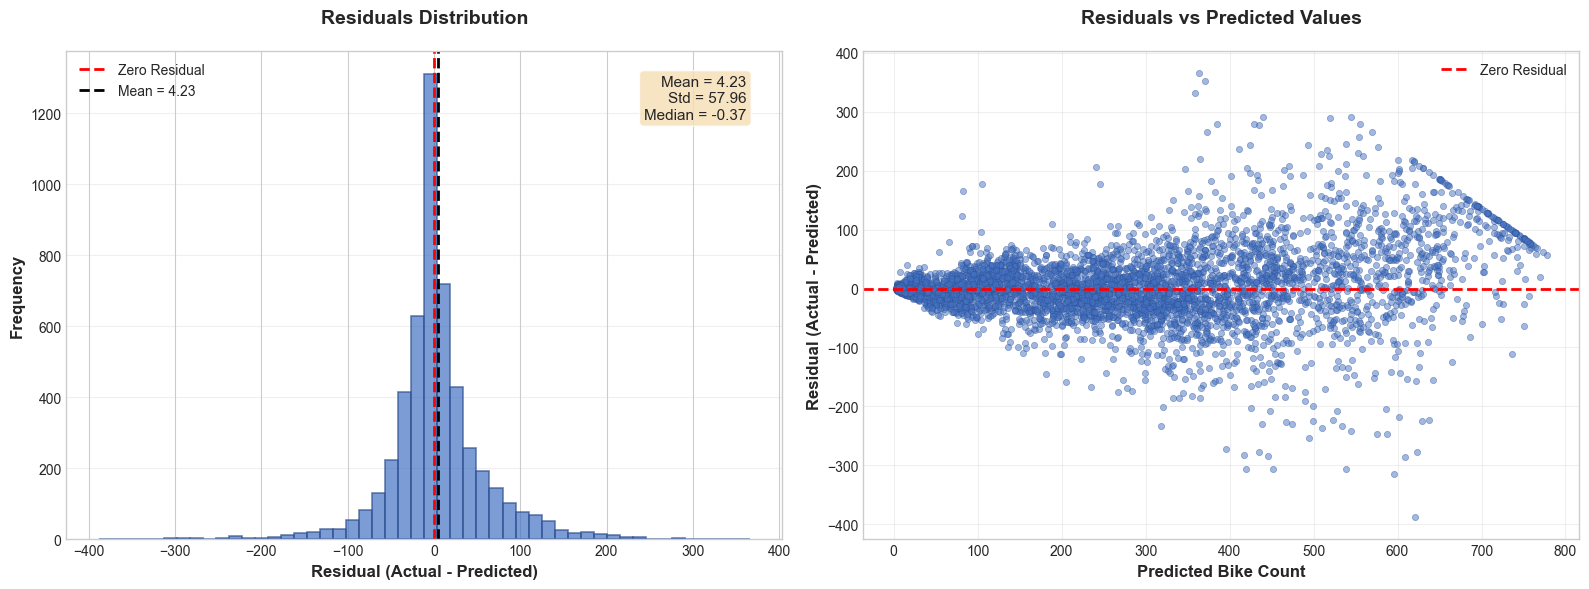


Residuals Statistics:
  Mean: 4.23
  Std Dev: 57.96
  Median: -0.37
  Min: -388.19
  Max: 365.92


In [259]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_actual - y_pred_rf
mean_residual = residuals.mean()
std_residual = residuals.std()
median_residual = np.median(residuals)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]

# Plot histogram with blue color
ax.hist(residuals, bins=50, alpha=0.7, color='#4472C4', edgecolor='#2E5090', linewidth=1.2)

# Add vertical lines for zero and mean
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
ax.axvline(x=mean_residual, color='black', linestyle='--', linewidth=2,
           label=f'Mean = {mean_residual:.2f}')

# Labels and title
ax.set_xlabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Residuals Distribution', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Add statistics text box
textstr = f'Mean = {mean_residual:.2f}\nStd = {std_residual:.2f}\nMedian = {median_residual:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right', bbox=props)


ax = axes[1]

# Scatter plot with blue color
ax.scatter(y_pred_rf, residuals, alpha=0.5, s=20, color='#4472C4', edgecolors='#2E5090', linewidth=0.5)

# Add horizontal line at zero
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')

# Labels and title
ax.set_xlabel('Predicted Bike Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
ax.set_title('Residuals vs Predicted Values', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/rf_residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nResiduals Statistics:")
print(f"  Mean: {mean_residual:.2f}")
print(f"  Std Dev: {std_residual:.2f}")
print(f"  Median: {median_residual:.2f}")
print(f"  Min: {residuals.min():.2f}")
print(f"  Max: {residuals.max():.2f}")

# XGBoost Regression Model with SHAP Analysis

This notebook builds an XGBoost model for bike sharing demand prediction with:
- XGBRegressor (gradient boosting)
- RandomizedSearchCV for hyperparameter tuning
- TimeSeriesSplit cross-validation
- SHAP for model interpretability with dependence plots

## 4.2. Create Directories

In [219]:
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

## 4.3. Load Data

In [220]:

# Load training data
X_train = pd.read_csv('data/X_train.csv', index_col=0)
y_train = pd.read_csv('data/y_train.csv', index_col=0).squeeze()

# Load test data
X_test = pd.read_csv('data/X_test.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0).squeeze()

print(f"   ✓ X_train shape: {X_train.shape}")
print(f"   ✓ y_train shape: {y_train.shape}")
print(f"   ✓ X_test shape: {X_test.shape}")
print(f"   ✓ y_test shape: {y_test.shape}")

# Display feature names
print(f"\n   Features ({len(X_train.columns)}):")
for i, col in enumerate(X_train.columns, 1):
    print(f"   {i:2d}. {col}")

   ✓ X_train shape: (12047, 40)
   ✓ y_train shape: (12047,)
   ✓ X_test shape: (5164, 40)
   ✓ y_test shape: (5164,)

   Features (40):
    1. workingday
    2. temp
    3. feel_temp
    4. humidity
    5. windspeed
    6. dayofweek
    7. is_weekend
    8. is_holiday
    9. hour_sin
   10. hour_cos
   11. month_sin
   12. month_cos
   13. season_fall
   14. season_spring
   15. season_summer
   16. season_winter
   17. weather_clear
   18. weather_heavy_rain
   19. weather_misty
   20. weather_rain
   21. cnt_lag_1h
   22. cnt_lag_2h
   23. cnt_lag_3h
   24. cnt_lag_24h
   25. cnt_lag_168h
   26. cnt_lag_1d_mean
   27. cnt_rolling_mean_3h
   28. cnt_rolling_mean_6h
   29. cnt_rolling_mean_12h
   30. cnt_rolling_mean_24h
   31. cnt_rolling_std_24h
   32. cnt_rolling_min_24h
   33. cnt_rolling_max_24h
   34. temp_squared
   35. humidity_squared
   36. hour_magnitude
   37. temp_comfort
   38. temp_feel_diff
   39. is_high_humidity
   40. is_low_humidity


## 4.4. Set Up TimeSeriesSplit Cross-Validation

In [221]:

# Create TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)


# Visualize the splits
print("\n   Split information:")
for i, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
    print(f"   Split {i}: Train size={len(train_idx):5d}, Validation size={len(val_idx):5d}")


   Split information:
   Split 1: Train size= 2012, Validation size= 2007
   Split 2: Train size= 4019, Validation size= 2007
   Split 3: Train size= 6026, Validation size= 2007
   Split 4: Train size= 8033, Validation size= 2007
   Split 5: Train size=10040, Validation size= 2007


## 4.5. Define Hyperparameter Grid for RandomizedSearchCV

In [222]:
# Define parameter distributions
param_distributions = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

print("   ✓ Parameter ranges defined:")
for param, values in param_distributions.items():
    print(f"      - {param}: {values}")

# Calculate total combinations
total_combinations = 1
for values in param_distributions.values():
    total_combinations *= len(values)
print(f"\n   ✓ Total possible combinations: {total_combinations}")
print(f"   ✓ RandomizedSearchCV will sample 30 of these")

   ✓ Parameter ranges defined:
      - n_estimators: [100, 300, 500]
      - learning_rate: [0.01, 0.05, 0.1]
      - max_depth: [3, 6, 10]
      - subsample: [0.6, 0.8, 1.0]
      - colsample_bytree: [0.6, 0.8, 1.0]

   ✓ Total possible combinations: 243
   ✓ RandomizedSearchCV will sample 30 of these


## 4.6. Create and Run RandomizedSearchCV

In [223]:
# Create XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    tree_method='hist'  # Faster training
)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=30,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    random_state=RANDOM_STATE,
    return_train_score=True
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print(f"\n   Best parameters: {random_search.best_params_}")
print(f"   Best cross-validation MAE: {-random_search.best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=1.0; total time=   2.0s
[CV] END cols

## 4.7. Display Cross-Validation Results

In [224]:

# Create DataFrame with CV results
cv_results = pd.DataFrame(random_search.cv_results_)

# Select and display relevant columns
results_display = cv_results[[
    'params', 
    'mean_train_score', 
    'std_train_score',
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'
]].copy()

# Convert negative MAE to positive
results_display['mean_train_MAE'] = -results_display['mean_train_score']
results_display['mean_val_MAE'] = -results_display['mean_test_score']
results_display['std_val_MAE'] = results_display['std_test_score']

# Sort by rank and display top 10
results_display = results_display.sort_values('rank_test_score')
print("Top 5 models by validation MAE:")
display(results_display[['params', 'mean_train_MAE', 'mean_val_MAE', 'std_val_MAE', 'rank_test_score']].head(5))

Top 5 models by validation MAE:


,params,mean_train_MAE,mean_val_MAE,std_val_MAE,rank_test_score
9,"{'subsample': 1.0, 'n_estimators': 300, 'max_d...",17.169313,34.242043,10.278883,1
20,"{'subsample': 0.6, 'n_estimators': 500, 'max_d...",15.209636,34.314459,12.179373,2
23,"{'subsample': 0.6, 'n_estimators': 300, 'max_d...",17.241403,34.863463,11.313197,3
12,"{'subsample': 1.0, 'n_estimators': 100, 'max_d...",9.996792,35.193078,14.931448,4
2,"{'subsample': 1.0, 'n_estimators': 500, 'max_d...",3.517075,35.941898,15.607130,5


## 4.8. Get Best Model and Evaluate on Test Set

In [225]:

# Get best model
best_xgb_model = random_search.best_estimator_

# Make predictions on test set
y_pred_test = best_xgb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("   Test Set Performance:")
print(f"   Mean Absolute Error (MAE):  {mae:8.4f}")
print(f"   Root Mean Squared Error (RMSE): {rmse:8.4f}")
print(f"   R² Score:                       {r2:8.4f}")

# Also get predictions on training set for comparison
y_pred_train = best_xgb_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

print("\n   Training Set Performance:")
print(f"   Mean Absolute Error (MAE):  {train_mae:8.4f}")
print(f"   Root Mean Squared Error (RMSE): {train_rmse:8.4f}")
print(f"   R² Score:                       {train_r2:8.4f}")


   Test Set Performance:
   Mean Absolute Error (MAE):   39.0186
   Root Mean Squared Error (RMSE):  58.2767
   R² Score:                         0.9288

   Training Set Performance:
   Mean Absolute Error (MAE):   22.5394
   Root Mean Squared Error (RMSE):  34.0779
   R² Score:                         0.9506


## 4.9. Save Model and Metrics

In [226]:

# Save model
model_path = 'models/xgb_best.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_xgb_model, f)
print(f"   ✓ Model saved to {model_path}")

# Prepare metrics dictionary
metrics = {
    "model_type": "XGBoost Regressor",
    "best_params": random_search.best_params_,
    "cross_validation": {
        "n_splits": 5,
        "cv_method": "TimeSeriesSplit",
        "best_cv_mae": float(-random_search.best_score_)
    },
    "train_metrics": {
        "mae": float(train_mae),
        "rmse": float(train_rmse),
        "r2": float(train_r2)
    },
    "test_metrics": {
        "mae": float(mae),
        "rmse": float(rmse),
        "r2": float(r2)
    },
    "target_statistics": {
        "train_mean": float(y_train.mean()),
        "train_std": float(y_train.std()),
        "test_mean": float(y_test.mean()),
        "test_std": float(y_test.std())
    },
    "random_state": RANDOM_STATE
}

# Save metrics
metrics_path = 'results/xgb_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=2)
print(f"   ✓ Metrics saved to {metrics_path}")

   ✓ Model saved to models/xgb_best.pkl
   ✓ Metrics saved to results/xgb_metrics.json


## 4.10. Plot Actual vs Predicted

    Plot saved to results/actual_vs_pred_xgb.png


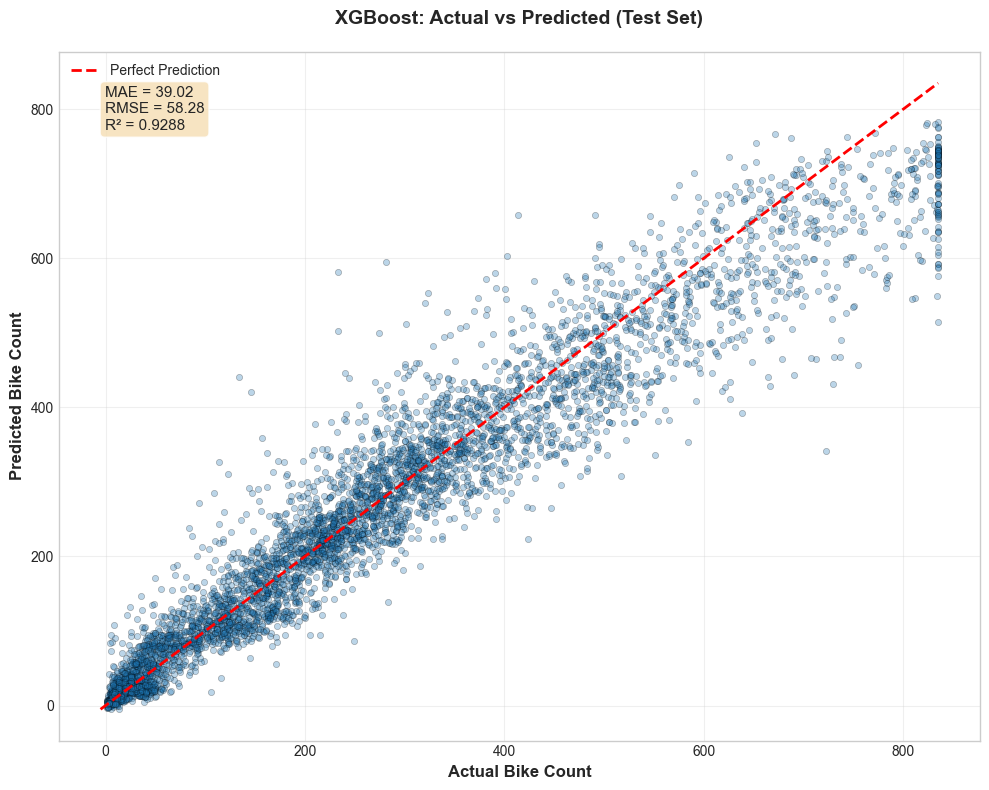

In [227]:

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create scatter plot
ax.scatter(y_test, y_pred_test, alpha=0.3, s=20, edgecolors='k', linewidths=0.5)

# Add perfect prediction line
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Labels and title
ax.set_xlabel('Actual Bike Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Bike Count', fontsize=12, fontweight='bold')
ax.set_title('XGBoost: Actual vs Predicted (Test Set)', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Add metrics text box
textstr = f'MAE = {mae:.2f}\nRMSE = {rmse:.2f}\nR² = {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()

# Save figure
plot_path = 'results/actual_vs_pred_xgb.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"    Plot saved to {plot_path}")

plt.show()

## 4.11. Plot Residuals

   ✓ Plot saved to results/residuals_xgb.png


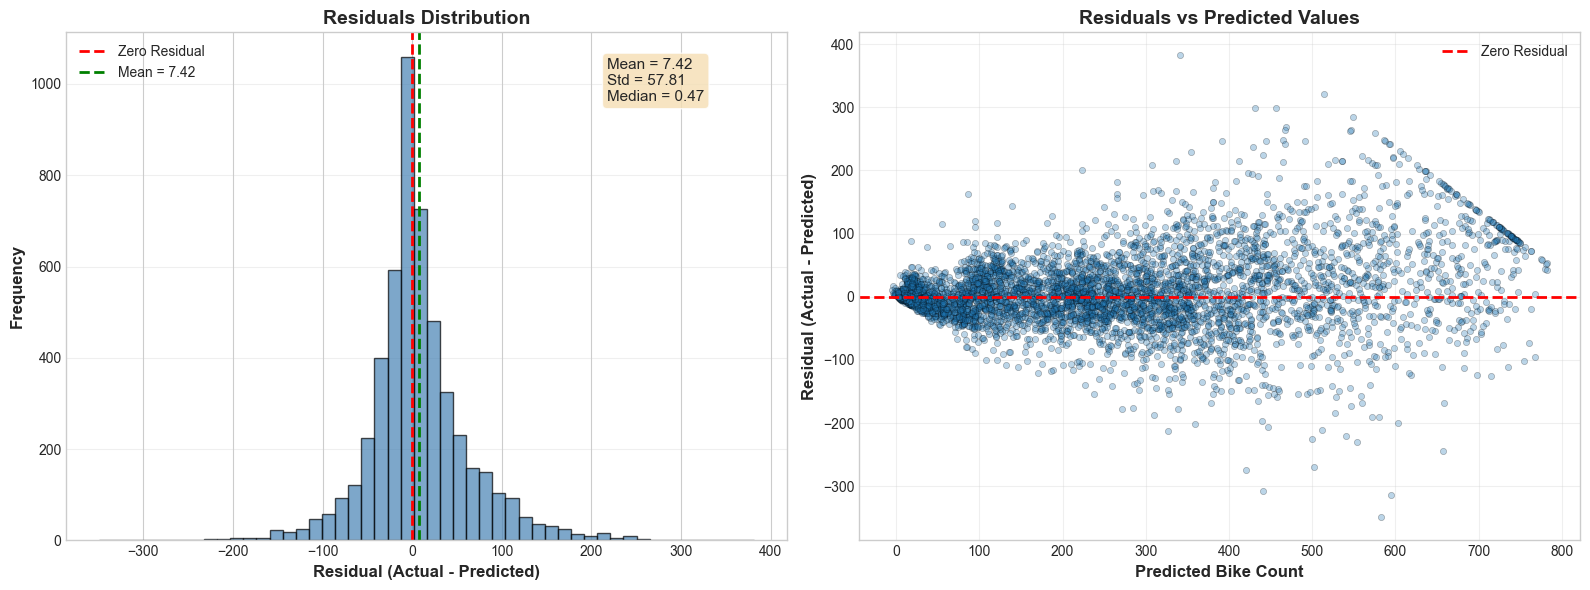

In [228]:

# Calculate residuals
residuals = y_test - y_pred_test

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Residuals histogram
ax1.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
mean_residual = residuals.mean()
ax1.axvline(x=mean_residual, color='green', linestyle='--', linewidth=2, 
           label=f'Mean = {mean_residual:.2f}')
ax1.set_xlabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Residuals Distribution', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Add statistics text box
textstr = f'Mean = {residuals.mean():.2f}\nStd = {residuals.std():.2f}\nMedian = {residuals.median():.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax1.text(0.75, 0.95, textstr, transform=ax1.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Subplot 2: Residuals vs Predicted
ax2.scatter(y_pred_test, residuals, alpha=0.3, s=20, edgecolors='k', linewidths=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
ax2.set_xlabel('Predicted Bike Count', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
ax2.set_title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()

# Save figure
plot_path = 'results/residuals_xgb.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Plot saved to {plot_path}")

plt.show()

## 4.12. SHAP Analysis - Initialize Explainer

In [229]:

# Get feature importances from XGBoost
feature_importance = best_xgb_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("   Top 10 Most Important Features:")
for idx, row in importance_df.head(10).iterrows():
    print(f"   {row['Feature']:<25} {row['Importance']:>15.6f}")




   Top 10 Most Important Features:
   cnt_lag_1h                       0.372448
   cnt_lag_24h                      0.186802
   cnt_lag_168h                     0.091598
   hour_cos                         0.040886
   hour_sin                         0.040389
   cnt_rolling_mean_3h              0.037987
   weather_rain                     0.037037
   cnt_rolling_max_24h              0.026509
   weather_clear                    0.024671
   cnt_lag_3h                       0.014956


## 4.15. Save Predictions to CSV

In [230]:

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'index': X_test.index,
    'y_true': y_test.values,
    'y_pred': y_pred_test
})

# Save to CSV
predictions_path = 'results/xgb_predictions.csv'
predictions_df.to_csv(predictions_path, index=False)
print(f"   ✓ Predictions saved to {predictions_path}")
print(f"   ✓ Shape: {predictions_df.shape}")

# Display first few rows
print("\n   First 5 predictions:")
display(predictions_df.head(5))

# Calculate error statistics
predictions_df['error'] = predictions_df['y_true'] - predictions_df['y_pred']
predictions_df['abs_error'] = np.abs(predictions_df['error'])
predictions_df['pct_error'] = (predictions_df['abs_error'] / predictions_df['y_true']) * 100

print("\n   Error Statistics:")
print(f"   Mean Absolute Error: {predictions_df['abs_error'].mean():.2f}")
print(f"   Median Absolute Error: {predictions_df['abs_error'].median():.2f}")
print(f"   Mean Percentage Error: {predictions_df['pct_error'].mean():.2f}%")
print(f"   Max Error: {predictions_df['abs_error'].max():.2f}")

   ✓ Predictions saved to results/xgb_predictions.csv
   ✓ Shape: (5164, 3)

   First 5 predictions:


,index,y_true,y_pred
0,2012-05-29 04:00:00,5.0,6.489949
1,2012-05-29 05:00:00,33.0,17.951290
2,2012-05-29 06:00:00,154.0,98.995071
3,2012-05-29 07:00:00,450.0,337.960419
4,2012-05-29 08:00:00,634.0,524.552612



   Error Statistics:
   Mean Absolute Error: 39.02
   Median Absolute Error: 24.76
   Mean Percentage Error: 31.60%
   Max Error: 382.07


# Multi-Layer Perceptron (Neural Network) Regression Model

This notebook builds a Neural Network model for bike sharing demand prediction with:
- MLPRegressor (Multi-Layer Perceptron)
- StandardScaler for feature normalization
- RandomizedSearchCV for hyperparameter tuning
- TimeSeriesSplit cross-validation
- Learning curve analysis

## 5.1. Setup and Imports

## 5.2. Create Directories

In [231]:
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)


## 5.3. Load Data

In [232]:

# Load training data
X_train = pd.read_csv('data/X_train.csv', index_col=0)
y_train = pd.read_csv('data/y_train.csv', index_col=0).squeeze()

# Load test data
X_test = pd.read_csv('data/X_test.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0).squeeze()

print(f"   ✓ X_train shape: {X_train.shape}")
print(f"   ✓ y_train shape: {y_train.shape}")
print(f"   ✓ X_test shape: {X_test.shape}")
print(f"   ✓ y_test shape: {y_test.shape}")

   ✓ X_train shape: (12047, 40)
   ✓ y_train shape: (12047,)
   ✓ X_test shape: (5164, 40)
   ✓ y_test shape: (5164,)


## 5.4. Build Pipeline with StandardScaler and MLPRegressor

In [233]:

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        random_state=RANDOM_STATE,
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=20,
        verbose=False
    ))
])


## 5.5. Set Up TimeSeriesSplit Cross-Validation

In [234]:

# Create TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)


# Visualize the splits
print("\n   Split information:")
for i, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
    print(f"   Split {i}: Train size={len(train_idx):5d}, Validation size={len(val_idx):5d}")


   Split information:
   Split 1: Train size= 2012, Validation size= 2007
   Split 2: Train size= 4019, Validation size= 2007
   Split 3: Train size= 6026, Validation size= 2007
   Split 4: Train size= 8033, Validation size= 2007
   Split 5: Train size=10040, Validation size= 2007


## 5.6. Define Hyperparameter Grid for RandomizedSearchCV

In [235]:

# Define parameter distributions
param_distributions = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-4, 1e-3, 1e-2],
    'mlp__learning_rate_init': [1e-3, 1e-4]
}

# Calculate total combinations
total_combinations = 1
for values in param_distributions.values():
    total_combinations *= len(values)
print(f"\n   ✓ Total possible combinations: {total_combinations}")


   ✓ Total possible combinations: 36


## 5.7. Run RandomizedSearchCV

In [236]:

# Create RandomizedSearchCV
# Since we have only 36 combinations, we'll try all of them (n_iter=36)
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=36,  # Try all combinations
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    random_state=RANDOM_STATE,
    return_train_score=True
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print(f"\n   Best parameters: {random_search.best_params_}")
print(f"   Best cross-validation MAE: {-random_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate_init=0.001; total time=   0.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate_init=0.0001; total time=   2.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate_init=0.001; total time=   3.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate_init=0.0001; total time=   3.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate_init=0.0001; total time=   4.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate_init=0.001; total time=   4.9s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,), mlp__learning_rate_init=0.001; total time=   1.0s
[CV] END mlp__act

## 5.8. Display Cross-Validation Results

In [237]:

# Create DataFrame with CV results
cv_results = pd.DataFrame(random_search.cv_results_)

# Select and display relevant columns
results_display = cv_results[[
    'params', 
    'mean_train_score', 
    'std_train_score',
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'
]].copy()

# Convert negative MAE to positive
results_display['mean_train_MAE'] = -results_display['mean_train_score']
results_display['mean_val_MAE'] = -results_display['mean_test_score']
results_display['std_val_MAE'] = results_display['std_test_score']

# Sort by rank and display top 5
results_display = results_display.sort_values('rank_test_score')
print("Top 5 models by validation MAE:")
display(results_display[['params', 'mean_train_MAE', 'mean_val_MAE', 'std_val_MAE', 'rank_test_score']].head(5))

Top 5 models by validation MAE:


,params,mean_train_MAE,mean_val_MAE,std_val_MAE,rank_test_score
16,"{'mlp__learning_rate_init': 0.001, 'mlp__hidde...",18.492851,36.426237,2.754596,1
10,"{'mlp__learning_rate_init': 0.001, 'mlp__hidde...",18.959067,36.581051,2.464031,2
4,"{'mlp__learning_rate_init': 0.001, 'mlp__hidde...",18.503267,36.852222,2.483500,3
5,"{'mlp__learning_rate_init': 0.0001, 'mlp__hidd...",27.293306,45.143291,5.761559,4
11,"{'mlp__learning_rate_init': 0.0001, 'mlp__hidd...",27.295178,45.145650,5.759559,5


## 5.9. Get Best Model and Evaluate on Test Set

In [238]:

# Get best model
best_mlp_model = random_search.best_estimator_

# Make predictions on test set
y_pred_test = best_mlp_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("   Test Set Performance:")
print(f"   Mean Absolute Error (MAE):  {mae:8.4f}")
print(f"   Root Mean Squared Error (RMSE): {rmse:8.4f}")
print(f"   R² Score:                       {r2:8.4f}")

# Also get predictions on training set for comparison
y_pred_train = best_mlp_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

print("\n   Training Set Performance:")
print(f"   Mean Absolute Error (MAE):  {train_mae:8.4f}")
print(f"   Root Mean Squared Error (RMSE): {train_rmse:8.4f}")
print(f"   R² Score:                       {train_r2:8.4f}")

# Display neural network architecture
mlp = best_mlp_model.named_steps['mlp']
print(f"\n   Neural Network Architecture:")
print(f"   Input layer: {X_train.shape[1]} features")
for i, layer_size in enumerate(mlp.hidden_layer_sizes, 1):
    print(f"   Hidden layer {i}: {layer_size} neurons")
print(f"   Output layer: 1 neuron (regression)")
print(f"   Total parameters: {sum(w.size for w in mlp.coefs_) + sum(b.size for b in mlp.intercepts_)}")
print(f"   Training iterations: {mlp.n_iter_}")

   Test Set Performance:
   Mean Absolute Error (MAE):   35.5806
   Root Mean Squared Error (RMSE):  51.5076
   R² Score:                         0.9444

   Training Set Performance:
   Mean Absolute Error (MAE):   19.8919
   Root Mean Squared Error (RMSE):  29.3253
   R² Score:                         0.9634

   Neural Network Architecture:
   Input layer: 40 features
   Hidden layer 1: 64 neurons
   Hidden layer 2: 32 neurons
   Output layer: 1 neuron (regression)
   Total parameters: 4737
   Training iterations: 224


## 5.10. Save Model and Metrics

In [239]:

# Save model
model_path = 'models/mlp_best.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_mlp_model, f)
print(f"   ✓ Model saved to {model_path}")

# Prepare metrics dictionary
metrics = {
    "model_type": "Multi-Layer Perceptron Regressor",
    "best_params": random_search.best_params_,
    "architecture": {
        "input_features": int(X_train.shape[1]),
        "hidden_layers": list(mlp.hidden_layer_sizes),
        "output_neurons": 1,
        "total_parameters": int(sum(w.size for w in mlp.coefs_) + sum(b.size for b in mlp.intercepts_)),
        "training_iterations": int(mlp.n_iter_)
    },
    "cross_validation": {
        "n_splits": 5,
        "cv_method": "TimeSeriesSplit",
        "best_cv_mae": float(-random_search.best_score_)
    },
    "train_metrics": {
        "mae": float(train_mae),
        "rmse": float(train_rmse),
        "r2": float(train_r2)
    },
    "test_metrics": {
        "mae": float(mae),
        "rmse": float(rmse),
        "r2": float(r2)
    },
    "target_statistics": {
        "train_mean": float(y_train.mean()),
        "train_std": float(y_train.std()),
        "test_mean": float(y_test.mean()),
        "test_std": float(y_test.std())
    },
    "random_state": RANDOM_STATE
}

# Save metrics
metrics_path = 'results/mlp_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=2)
print(f"    Metrics saved to {metrics_path}")

   ✓ Model saved to models/mlp_best.pkl
    Metrics saved to results/mlp_metrics.json


## 5.11. Plotting Training History

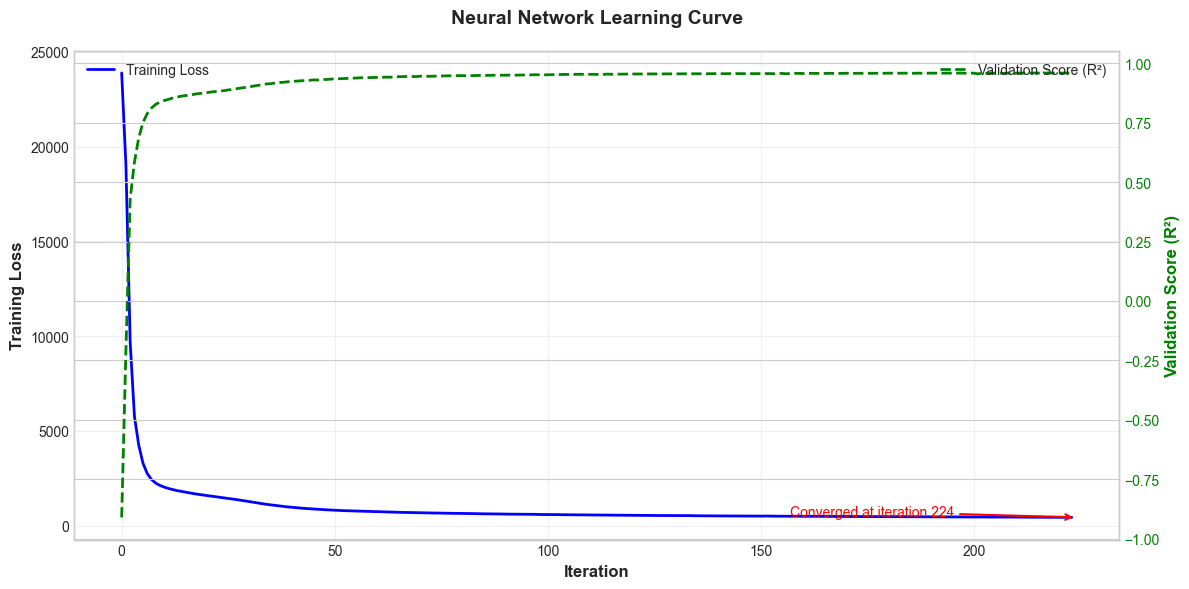

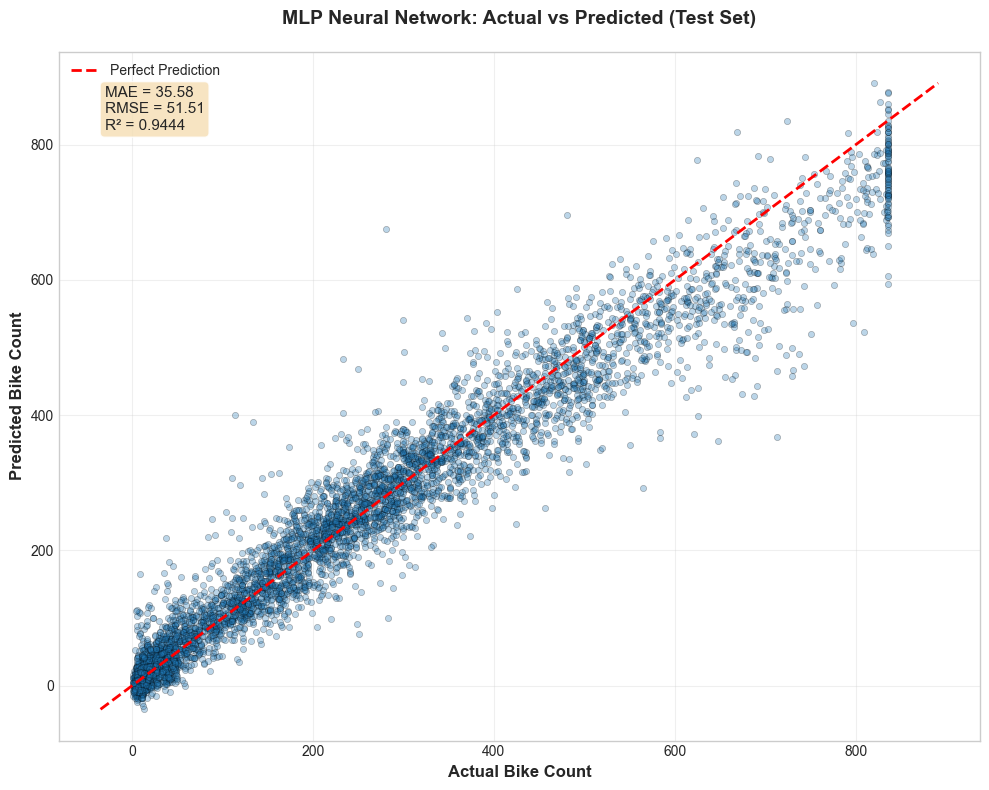

In [240]:

# Get the MLP model from the pipeline
mlp = best_mlp_model.named_steps['mlp']

# Check if loss curve is available
if hasattr(mlp, 'loss_curve_'):
    # Plot learning curve
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot training loss
    ax.plot(mlp.loss_curve_, label='Training Loss', linewidth=2, color='blue')
    
    # Plot validation loss if available
    if hasattr(mlp, 'validation_scores_') and mlp.validation_scores_ is not None:
        # Convert validation scores (R²) to loss-like metric for visualization
        ax2 = ax.twinx()
        ax2.plot(mlp.validation_scores_, label='Validation Score (R²)', 
                linewidth=2, color='green', linestyle='--')
        ax2.set_ylabel('Validation Score (R²)', fontsize=12, fontweight='bold', color='green')
        ax2.tick_params(axis='y', labelcolor='green')
        ax2.legend(loc='upper right', fontsize=10)
    
    ax.set_xlabel('Iteration', fontsize=12, fontweight='bold')
    ax.set_ylabel('Training Loss', fontsize=12, fontweight='bold')
    ax.set_title('Neural Network Learning Curve', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Add annotation for convergence
    ax.annotate(f'Converged at iteration {mlp.n_iter_}', 
               xy=(mlp.n_iter_, mlp.loss_curve_[-1]),
               xytext=(mlp.n_iter_*0.7, mlp.loss_curve_[-1]*1.2),
               arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
               fontsize=10, color='red')
    
    plt.tight_layout()
    plt.savefig('results/learning_curve_mlp.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("  Loss curve not available, creating actual vs predicted plot instead...")

# Create Actual vs Predicted plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y_test, y_pred_test, alpha=0.3, s=20, edgecolors='k', linewidths=0.5)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Bike Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Bike Count', fontsize=12, fontweight='bold')
ax.set_title('MLP Neural Network: Actual vs Predicted (Test Set)', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

textstr = f'MAE = {mae:.2f}\nRMSE = {rmse:.2f}\nR² = {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('results/predicted_vs_actual_mlp.png', dpi=300, bbox_inches='tight')
plt.show()

## 5.12. Plot Residuals

   ✓ Residuals plot saved to results/residuals_mlp.png


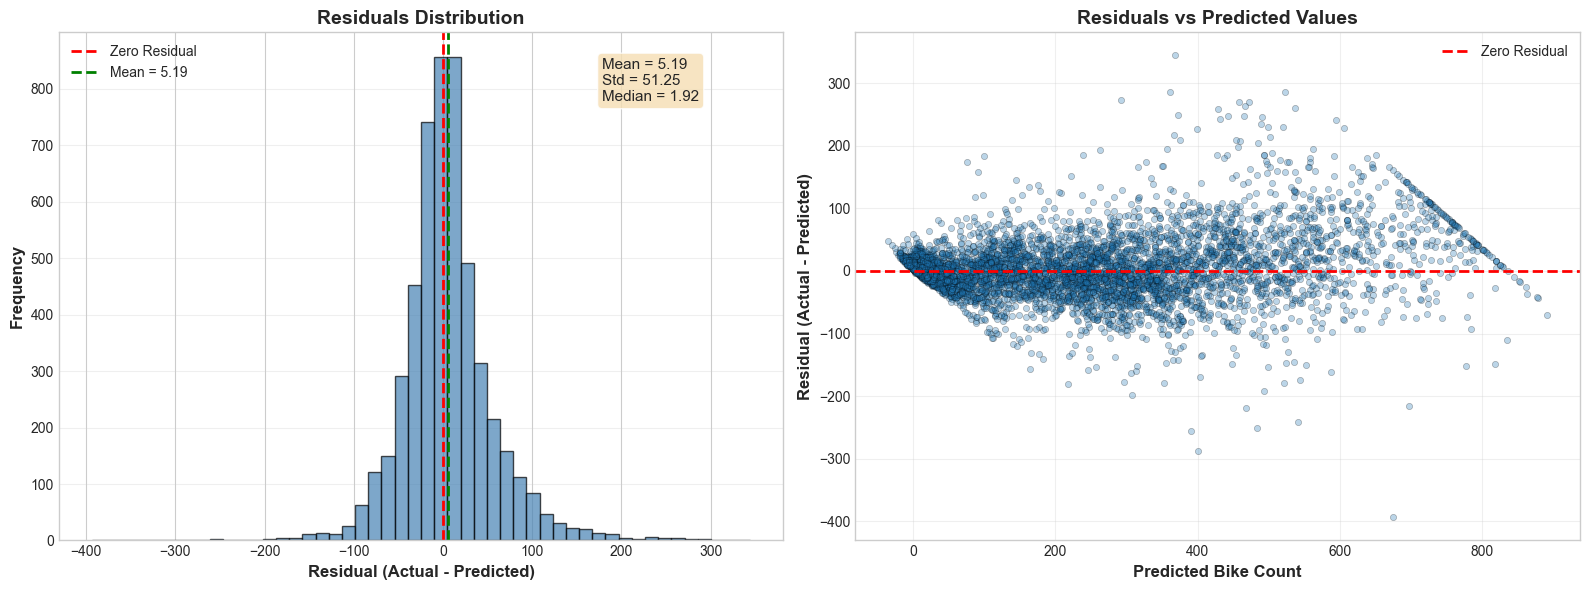

In [241]:

# Calculate residuals
residuals = y_test - y_pred_test

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Residuals histogram
ax1.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
mean_residual = residuals.mean()
ax1.axvline(x=mean_residual, color='green', linestyle='--', linewidth=2, 
           label=f'Mean = {mean_residual:.2f}')
ax1.set_xlabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Residuals Distribution', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

textstr = f'Mean = {residuals.mean():.2f}\nStd = {residuals.std():.2f}\nMedian = {residuals.median():.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax1.text(0.75, 0.95, textstr, transform=ax1.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Subplot 2: Residuals vs Predicted
ax2.scatter(y_pred_test, residuals, alpha=0.3, s=20, edgecolors='k', linewidths=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
ax2.set_xlabel('Predicted Bike Count', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
ax2.set_title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/residuals_mlp.png', dpi=300, bbox_inches='tight')
print(f"   ✓ Residuals plot saved to results/residuals_mlp.png")
plt.show()

## 5.13. Save Predictions to CSV

In [242]:

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'index': X_test.index,
    'y_true': y_test.values,
    'y_pred': y_pred_test
})

# Save to CSV
predictions_path = 'results/mlp_predictions.csv'
predictions_df.to_csv(predictions_path, index=False)
print(f"   ✓ Predictions saved to {predictions_path}")
print(f"   ✓ Shape: {predictions_df.shape}")

# Display first few rows
print("\n   First 10 predictions:")
display(predictions_df.head(10))

# Calculate error statistics
predictions_df['error'] = predictions_df['y_true'] - predictions_df['y_pred']
predictions_df['abs_error'] = np.abs(predictions_df['error'])

print("\n   Error Statistics:")
print(f"   Mean Absolute Error: {predictions_df['abs_error'].mean():.2f}")
print(f"   Median Absolute Error: {predictions_df['abs_error'].median():.2f}")
print(f"   Max Error: {predictions_df['abs_error'].max():.2f}")
print(f"   Min Error: {predictions_df['abs_error'].min():.2f}")

   ✓ Predictions saved to results/mlp_predictions.csv
   ✓ Shape: (5164, 3)

   First 10 predictions:


,index,y_true,y_pred
0,2012-05-29 04:00:00,5.0,6.035453
1,2012-05-29 05:00:00,33.0,33.411021
2,2012-05-29 06:00:00,154.0,119.773303
3,2012-05-29 07:00:00,450.0,412.214333
4,2012-05-29 08:00:00,634.0,563.597279
5,2012-05-29 09:00:00,257.0,261.648773
6,2012-05-29 10:00:00,183.0,163.751693
7,2012-05-29 11:00:00,197.0,242.156794
8,2012-05-29 12:00:00,237.0,225.778739
9,2012-05-29 13:00:00,239.0,237.506971



   Error Statistics:
   Mean Absolute Error: 35.58
   Median Absolute Error: 23.54
   Max Error: 393.82
   Min Error: 0.00


## 6. Model Comparison Demonstration

This cell demonstrates all 4 models making predictions on the same input and compares them to the actual value.


In [243]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compare_all_models(test_index=None, feature_row=None):
    """
    Load all 4 models and make predictions, comparing to actual value.
    
    Parameters:
    -----------
    test_index : int, optional
        Index from test set to use (0 to len(X_test)-1)
        If None and feature_row is None, uses a random index
    feature_row : pandas Series or dict, optional
        Custom feature row with all 40 features. Must match X_test columns.
        If provided, actual_value will be None (can't compare to actual)
    
    Returns:
    --------
    dict : Dictionary with predictions, actual value, and errors
    """
    
    # Load test data
    X_test = pd.read_csv('data/X_test.csv', index_col=0)
    y_test = pd.read_csv('data/y_test.csv', index_col=0).squeeze()
    
    # Determine which row to use
    if feature_row is not None:
        # Use custom features
        if isinstance(feature_row, dict):
            feature_row = pd.Series(feature_row)
        X_sample = feature_row.to_frame().T
        actual_value = None
    else:
        # Use test set row
        if test_index is None:
            test_index = np.random.randint(0, len(X_test))
        X_sample = X_test.iloc[test_index:test_index+1]
        actual_value = float(y_test.iloc[test_index])
    
    # Ensure feature order matches training data
    feature_order = X_test.columns.tolist()
    X_sample = X_sample[feature_order]
    
    # Convert all columns to numeric types (required by XGBoost)
    for col in X_sample.columns:
        if X_sample[col].dtype == 'object':
            X_sample[col] = pd.to_numeric(X_sample[col], errors='coerce')
        elif X_sample[col].dtype == 'bool':
            X_sample[col] = X_sample[col].astype(int)
    
    if X_sample.isnull().any().any():
        X_sample = X_sample.fillna(0)
    
    for col in X_sample.columns:
        if not pd.api.types.is_numeric_dtype(X_sample[col]):
            X_sample[col] = pd.to_numeric(X_sample[col], errors='coerce').fillna(0)
    
    # Load all models
    with open('models/linear_baseline.pkl', 'rb') as f:
        linear_model = pickle.load(f)
    with open('models/rf_best.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    with open('models/xgb_best.pkl', 'rb') as f:
        xgb_model = pickle.load(f)
    with open('models/mlp_best.pkl', 'rb') as f:
        mlp_model = pickle.load(f)
    
    # Make predictions
    pred_linear = float(linear_model.predict(X_sample)[0])
    pred_rf = float(rf_model.predict(X_sample)[0])
    pred_xgb = float(xgb_model.predict(X_sample)[0])
    pred_mlp = float(mlp_model.predict(X_sample)[0])
    
    results = {
        'predictions': {
            'Linear Regression': pred_linear,
            'Random Forest': pred_rf,
            'XGBoost': pred_xgb,
            'MLP (Neural Network)': pred_mlp
        },
        'actual_value': actual_value,
        'errors': {},
        'best_model': None
    }
    
    if actual_value is not None:
        errors = {
            'Linear Regression': abs(actual_value - pred_linear),
            'Random Forest': abs(actual_value - pred_rf),
            'XGBoost': abs(actual_value - pred_xgb),
            'MLP (Neural Network)': abs(actual_value - pred_mlp)
        }
        results['errors'] = errors
        results['best_model'] = min(errors, key=errors.get)
    
    # Display comparison table
    print(f"{'Model':<25s} {'Prediction':>12s} {'Error':>12s} {'% Error':>10s}")
    print("-" * 80)
    
    for model_name in ['Linear Regression', 'Random Forest', 'XGBoost', 'MLP (Neural Network)']:
        pred = results['predictions'][model_name]
        if actual_value is not None:
            error = results['errors'][model_name]
            pct_error = (error / actual_value * 100) if actual_value > 0 else 0
            print(f"{model_name:<25s} {pred:>12.2f} {error:>12.2f} {pct_error:>9.2f}%")
        else:
            print(f"{model_name:<25s} {pred:>12.2f} {'N/A':>12s} {'N/A':>10s}")
    
    if actual_value is not None:
        print("-" * 80)
        print(f"{'Actual Value':<25s} {actual_value:>12.2f} {'-':>12s} {'-':>10s}")
    
    return results

print("EXAMPLE 1: Random Test Sample")
results1 = compare_all_models(test_index=None)  # Random index

print("\n\nEXAMPLE 2: Test Sample (index 100)")
results2 = compare_all_models(test_index=100)


EXAMPLE 1: Random Test Sample
Model                       Prediction        Error    % Error
--------------------------------------------------------------------------------
Linear Regression               446.42        23.58      5.02%
Random Forest                   457.99        12.01      2.56%
XGBoost                         445.15        24.85      5.29%
MLP (Neural Network)            431.63        38.37      8.16%
--------------------------------------------------------------------------------
Actual Value                    470.00            -          -


EXAMPLE 2: Test Sample (index 100)
Model                       Prediction        Error    % Error
--------------------------------------------------------------------------------
Linear Regression               283.34        73.34     34.93%
Random Forest                   208.20         1.80      0.86%
XGBoost                         232.15        22.15     10.55%
MLP (Neural Network)            172.97        37.03     17.6

# 6. Non-Tuned Baseline Models (Default Hyperparameters)

This section evaluates each model using default hyperparameters to demonstrate the impact of hyperparameter tuning. Each baseline model uses scikit-learn/XGBoost default settings without GridSearchCV or RandomizedSearchCV optimization.


1. BASIC LINEAR REGRESSION (Default Parameters)

   Training Set Performance:
   MAE:   38.3479
   RMSE:  57.3863
   R²:     0.8599

   Test Set Performance:
   MAE:   53.6754
   RMSE:  79.2649
   R²:     0.8683

[4/6] Saving model...
   ✓ Model saved to models/basic_linear_regression.pkl
   ✓ Metrics saved to results/basic_linear_metrics.json
   ✓ Plot saved to results/basic_linear_regression_plots.png


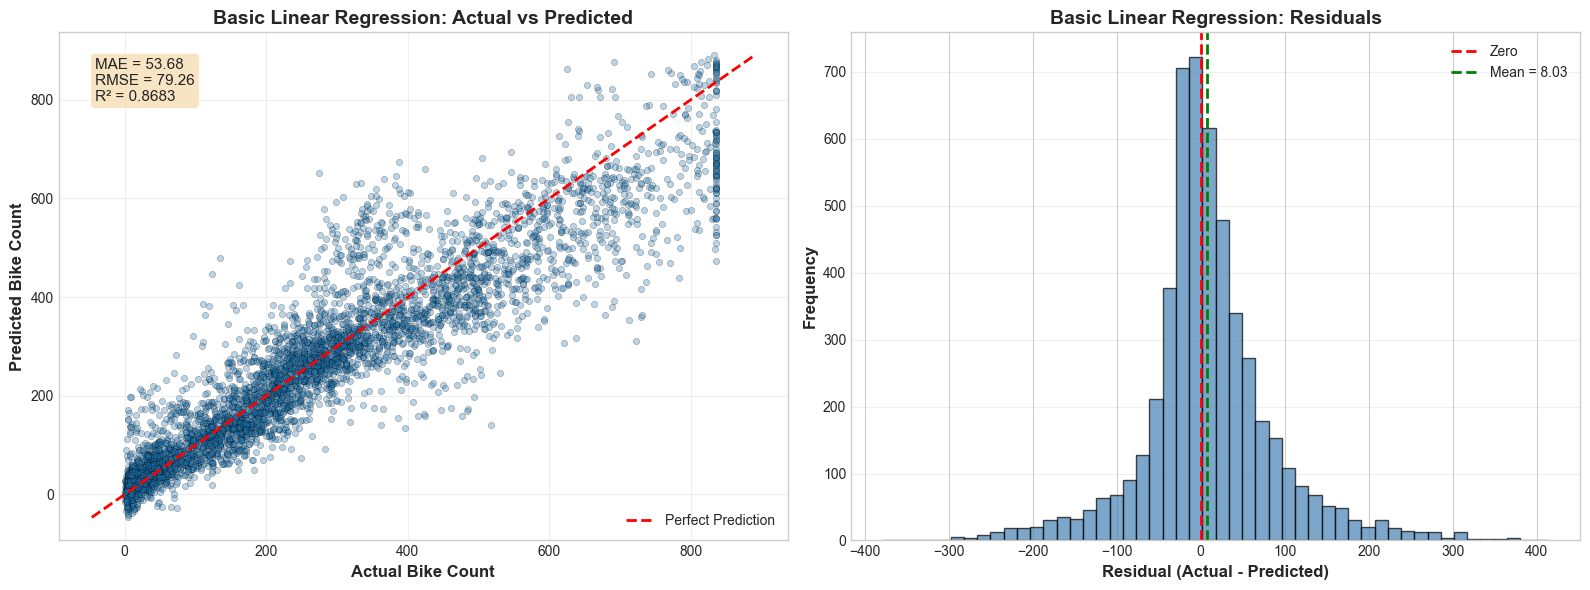

In [244]:
print("1. BASIC LINEAR REGRESSION (Default Parameters)")

# Create pipeline with default LinearRegression
basic_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train model
basic_lr.fit(X_train, y_train)

# Predictions
y_pred_train_lr = basic_lr.predict(X_train)
y_pred_test_lr = basic_lr.predict(X_test)

# Calculate metrics
train_mae_lr = mean_absolute_error(y_train, y_pred_train_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
train_r2_lr = r2_score(y_train, y_pred_train_lr)

test_mae_lr = mean_absolute_error(y_test, y_pred_test_lr)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
test_r2_lr = r2_score(y_test, y_pred_test_lr)

print("\n   Training Set Performance:")
print(f"   MAE:  {train_mae_lr:8.4f}")
print(f"   RMSE: {train_rmse_lr:8.4f}")
print(f"   R²:   {train_r2_lr:8.4f}")

print("\n   Test Set Performance:")
print(f"   MAE:  {test_mae_lr:8.4f}")
print(f"   RMSE: {test_rmse_lr:8.4f}")
print(f"   R²:   {test_r2_lr:8.4f}")

# Save model
print("\n[4/6] Saving model...")
model_path = 'models/basic_linear_regression.pkl'
joblib.dump(basic_lr, model_path)
print(f"   ✓ Model saved to {model_path}")

# Save metrics
metrics_lr = {
    "model_type": "Basic Linear Regression (No Tuning)",
    "parameters": "default",
    "train_metrics": {
        "mae": float(train_mae_lr),
        "rmse": float(train_rmse_lr),
        "r2": float(train_r2_lr)
    },
    "test_metrics": {
        "mae": float(test_mae_lr),
        "rmse": float(test_rmse_lr),
        "r2": float(test_r2_lr)
    }
}

metrics_path = 'results/basic_linear_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics_lr, f, indent=2)
print(f"   ✓ Metrics saved to {metrics_path}")

# Plot actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred_test_lr, alpha=0.3, s=20, edgecolors='k', linewidths=0.5)
min_val = min(y_test.min(), y_pred_test_lr.min())
max_val = max(y_test.max(), y_pred_test_lr.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Bike Count', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Bike Count', fontsize=12, fontweight='bold')
axes[0].set_title('Basic Linear Regression: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

textstr = f'MAE = {test_mae_lr:.2f}\nRMSE = {test_rmse_lr:.2f}\nR² = {test_r2_lr:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
axes[0].text(0.05, 0.95, textstr, transform=axes[0].transAxes, fontsize=11,
            verticalalignment='top', bbox=props)

# Residuals
residuals_lr = y_test - y_pred_test_lr
axes[1].hist(residuals_lr, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[1].axvline(x=residuals_lr.mean(), color='green', linestyle='--', linewidth=2, 
               label=f'Mean = {residuals_lr.mean():.2f}')
axes[1].set_xlabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Basic Linear Regression: Residuals', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plot_path = 'results/basic_linear_regression_plots.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Plot saved to {plot_path}")
plt.show()

2. BASIC RANDOM FOREST (Default Parameters)

   Training Set Performance:
   MAE:    7.5974
   RMSE:  12.6607
   R²:     0.9932

   Test Set Performance:
   MAE:   37.4688
   RMSE:  60.3644
   R²:     0.9236
   ✓ Model saved to models/basic_random_forest.pkl
   ✓ Metrics saved to results/basic_rf_metrics.json
   ✓ Plot saved to results/basic_random_forest_plots.png


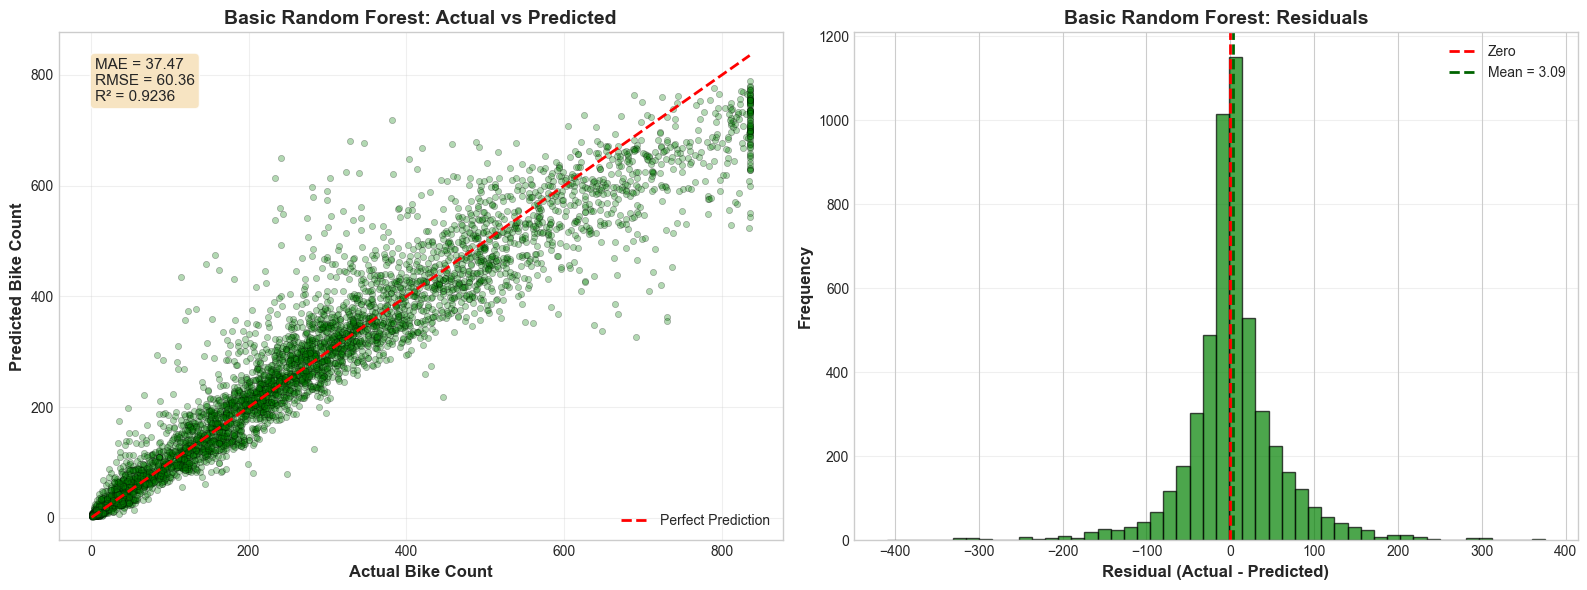

In [245]:
print("2. BASIC RANDOM FOREST (Default Parameters)")

# Create basic Random Forest with default parameters
basic_rf = RandomForestRegressor(random_state=42)

# Train model
basic_rf.fit(X_train, y_train)

# Predictions
y_pred_train_rf = basic_rf.predict(X_train)
y_pred_test_rf = basic_rf.predict(X_test)

# Calculate metrics
train_mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
train_r2_rf = r2_score(y_train, y_pred_train_rf)

test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print("\n   Training Set Performance:")
print(f"   MAE:  {train_mae_rf:8.4f}")
print(f"   RMSE: {train_rmse_rf:8.4f}")
print(f"   R²:   {train_r2_rf:8.4f}")

print("\n   Test Set Performance:")
print(f"   MAE:  {test_mae_rf:8.4f}")
print(f"   RMSE: {test_rmse_rf:8.4f}")
print(f"   R²:   {test_r2_rf:8.4f}")

# Save model
model_path = 'models/basic_random_forest.pkl'
joblib.dump(basic_rf, model_path)
print(f"   ✓ Model saved to {model_path}")

# Save metrics
metrics_rf = {
    "model_type": "Basic Random Forest (No Tuning)",
    "parameters": "default (n_estimators=100)",
    "train_metrics": {
        "mae": float(train_mae_rf),
        "rmse": float(train_rmse_rf),
        "r2": float(train_r2_rf)
    },
    "test_metrics": {
        "mae": float(test_mae_rf),
        "rmse": float(test_rmse_rf),
        "r2": float(test_r2_rf)
    }
}

metrics_path = 'results/basic_rf_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics_rf, f, indent=2)
print(f"   ✓ Metrics saved to {metrics_path}")

# Plot actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred_test_rf, alpha=0.3, s=20, edgecolors='k', linewidths=0.5, color='green')
min_val = min(y_test.min(), y_pred_test_rf.min())
max_val = max(y_test.max(), y_pred_test_rf.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Bike Count', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Bike Count', fontsize=12, fontweight='bold')
axes[0].set_title('Basic Random Forest: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

textstr = f'MAE = {test_mae_rf:.2f}\nRMSE = {test_rmse_rf:.2f}\nR² = {test_r2_rf:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
axes[0].text(0.05, 0.95, textstr, transform=axes[0].transAxes, fontsize=11,
            verticalalignment='top', bbox=props)

# Residuals
residuals_rf = y_test - y_pred_test_rf
axes[1].hist(residuals_rf, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[1].axvline(x=residuals_rf.mean(), color='darkgreen', linestyle='--', linewidth=2, 
               label=f'Mean = {residuals_rf.mean():.2f}')
axes[1].set_xlabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Basic Random Forest: Residuals', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plot_path = 'results/basic_random_forest_plots.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Plot saved to {plot_path}")
plt.show()


3. BASIC XGBOOST (Default Parameters)
   ✓ Training complete
   ✓ Predictions complete

   Training Set Performance:
   MAE:   10.2396
   RMSE:  14.3503
   R²:     0.9912

   Test Set Performance:
   MAE:   38.6798
   RMSE:  61.1629
   R²:     0.9216
   ✓ Model saved to models/basic_xgboost.pkl
   ✓ Metrics saved to results/basic_xgboost_metrics.json
   ✓ Plot saved to results/basic_xgboost_plots.png


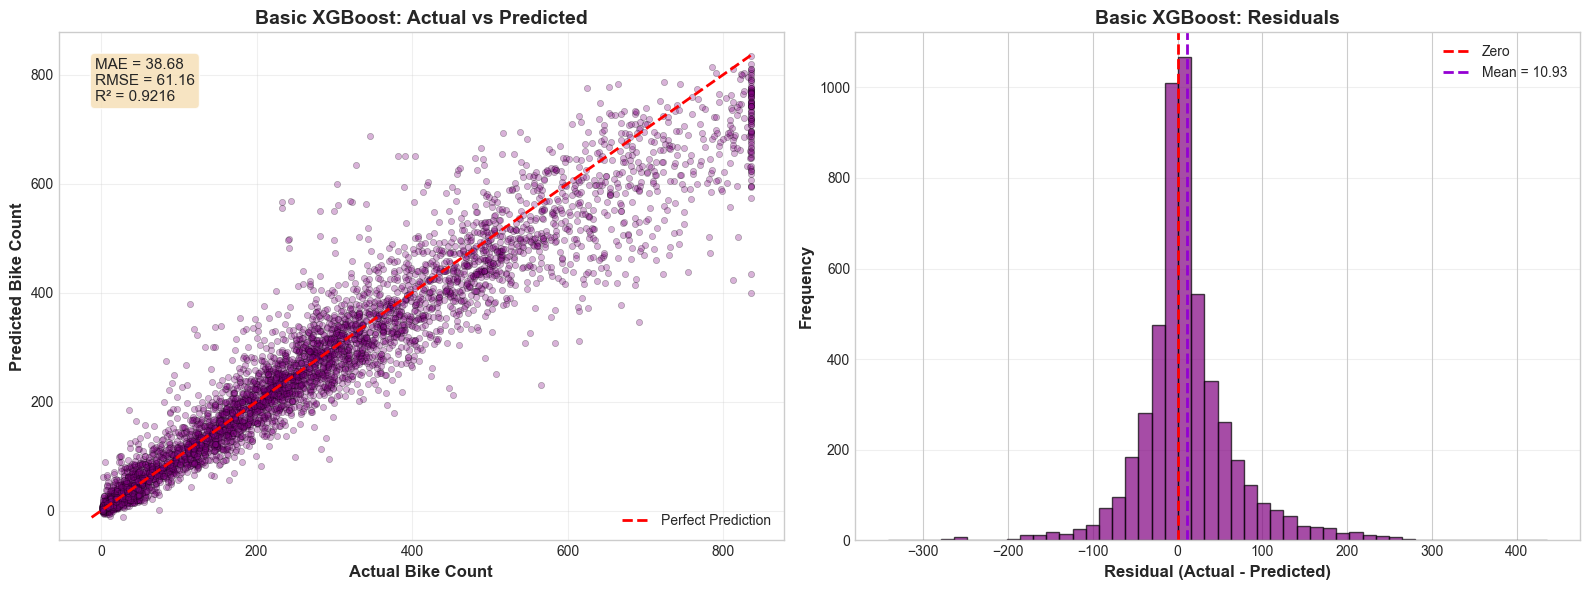

In [246]:
print("3. BASIC XGBOOST (Default Parameters)")

# Create basic XGBoost with default parameters
basic_xgb = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Train model
basic_xgb.fit(X_train, y_train)
print("   ✓ Training complete")

# Predictions
y_pred_train_xgb = basic_xgb.predict(X_train)
y_pred_test_xgb = basic_xgb.predict(X_test)
print("   ✓ Predictions complete")

# Calculate metrics
train_mae_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
train_r2_xgb = r2_score(y_train, y_pred_train_xgb)

test_mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
test_r2_xgb = r2_score(y_test, y_pred_test_xgb)

print("\n   Training Set Performance:")
print(f"   MAE:  {train_mae_xgb:8.4f}")
print(f"   RMSE: {train_rmse_xgb:8.4f}")
print(f"   R²:   {train_r2_xgb:8.4f}")

print("\n   Test Set Performance:")
print(f"   MAE:  {test_mae_xgb:8.4f}")
print(f"   RMSE: {test_rmse_xgb:8.4f}")
print(f"   R²:   {test_r2_xgb:8.4f}")

# Save model
model_path = 'models/basic_xgboost.pkl'
joblib.dump(basic_xgb, model_path)
print(f"   ✓ Model saved to {model_path}")

# Save metrics
metrics_xgb = {
    "model_type": "Basic XGBoost (No Tuning)",
    "parameters": "default (n_estimators=100, learning_rate=0.3, max_depth=6)",
    "train_metrics": {
        "mae": float(train_mae_xgb),
        "rmse": float(train_rmse_xgb),
        "r2": float(train_r2_xgb)
    },
    "test_metrics": {
        "mae": float(test_mae_xgb),
        "rmse": float(test_rmse_xgb),
        "r2": float(test_r2_xgb)
    }
}

metrics_path = 'results/basic_xgboost_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics_xgb, f, indent=2)
print(f"   ✓ Metrics saved to {metrics_path}")

# Plot actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred_test_xgb, alpha=0.3, s=20, edgecolors='k', linewidths=0.5, color='purple')
min_val = min(y_test.min(), y_pred_test_xgb.min())
max_val = max(y_test.max(), y_pred_test_xgb.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Bike Count', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Bike Count', fontsize=12, fontweight='bold')
axes[0].set_title('Basic XGBoost: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

textstr = f'MAE = {test_mae_xgb:.2f}\nRMSE = {test_rmse_xgb:.2f}\nR² = {test_r2_xgb:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
axes[0].text(0.05, 0.95, textstr, transform=axes[0].transAxes, fontsize=11,
            verticalalignment='top', bbox=props)

# Residuals
residuals_xgb = y_test - y_pred_test_xgb
axes[1].hist(residuals_xgb, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[1].axvline(x=residuals_xgb.mean(), color='darkviolet', linestyle='--', linewidth=2, 
               label=f'Mean = {residuals_xgb.mean():.2f}')
axes[1].set_xlabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Basic XGBoost: Residuals', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plot_path = 'results/basic_xgboost_plots.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Plot saved to {plot_path}")
plt.show()

4. BASIC MLP / NEURAL NETWORK (Default Parameters)
   ✓ Training complete (converged in 500 iterations)
   ✓ Predictions complete

   Training Set Performance:
   MAE:   23.0039
   RMSE:  33.7067
   R²:     0.9517

   Test Set Performance:
   MAE:   37.7855
   RMSE:  55.2083
   R²:     0.9361
   ✓ Model saved to models/basic_mlp.pkl
   ✓ Metrics saved to results/basic_mlp_metrics.json
   ✓ Plot saved to results/basic_mlp_plots.png


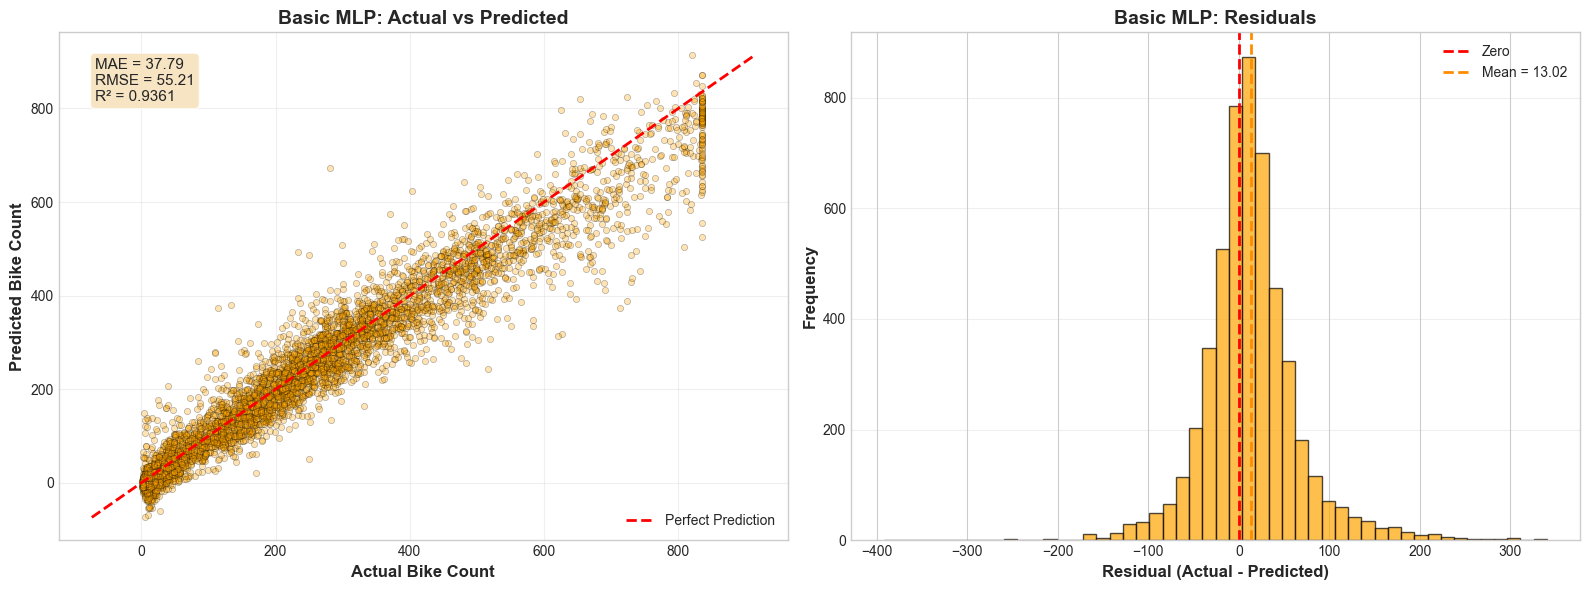

In [247]:
print("4. BASIC MLP / NEURAL NETWORK (Default Parameters)")

# Create pipeline with default MLPRegressor
basic_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=42, max_iter=500))
])

# Train model
basic_mlp.fit(X_train, y_train)
print(f"   ✓ Training complete (converged in {basic_mlp.named_steps['mlp'].n_iter_} iterations)")

# Predictions
y_pred_train_mlp = basic_mlp.predict(X_train)
y_pred_test_mlp = basic_mlp.predict(X_test)
print("   ✓ Predictions complete")

# Calculate metrics
train_mae_mlp = mean_absolute_error(y_train, y_pred_train_mlp)
train_rmse_mlp = np.sqrt(mean_squared_error(y_train, y_pred_train_mlp))
train_r2_mlp = r2_score(y_train, y_pred_train_mlp)

test_mae_mlp = mean_absolute_error(y_test, y_pred_test_mlp)
test_rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_test_mlp))
test_r2_mlp = r2_score(y_test, y_pred_test_mlp)

print("\n   Training Set Performance:")
print(f"   MAE:  {train_mae_mlp:8.4f}")
print(f"   RMSE: {train_rmse_mlp:8.4f}")
print(f"   R²:   {train_r2_mlp:8.4f}")

print("\n   Test Set Performance:")
print(f"   MAE:  {test_mae_mlp:8.4f}")
print(f"   RMSE: {test_rmse_mlp:8.4f}")
print(f"   R²:   {test_r2_mlp:8.4f}")

# Save model
model_path = 'models/basic_mlp.pkl'
joblib.dump(basic_mlp, model_path)
print(f"   ✓ Model saved to {model_path}")

# Save metrics
metrics_mlp = {
    "model_type": "Basic MLP (No Tuning)",
    "parameters": "default (hidden_layer_sizes=(100,), activation='relu')",
    "train_metrics": {
        "mae": float(train_mae_mlp),
        "rmse": float(train_rmse_mlp),
        "r2": float(train_r2_mlp)
    },
    "test_metrics": {
        "mae": float(test_mae_mlp),
        "rmse": float(test_rmse_mlp),
        "r2": float(test_r2_mlp)
    },
    "n_iterations": int(basic_mlp.named_steps['mlp'].n_iter_)
}

metrics_path = 'results/basic_mlp_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics_mlp, f, indent=2)
print(f"   ✓ Metrics saved to {metrics_path}")

# Plot actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred_test_mlp, alpha=0.3, s=20, edgecolors='k', linewidths=0.5, color='orange')
min_val = min(y_test.min(), y_pred_test_mlp.min())
max_val = max(y_test.max(), y_pred_test_mlp.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Bike Count', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Bike Count', fontsize=12, fontweight='bold')
axes[0].set_title('Basic MLP: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

textstr = f'MAE = {test_mae_mlp:.2f}\nRMSE = {test_rmse_mlp:.2f}\nR² = {test_r2_mlp:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
axes[0].text(0.05, 0.95, textstr, transform=axes[0].transAxes, fontsize=11,
            verticalalignment='top', bbox=props)

# Residuals
residuals_mlp = y_test - y_pred_test_mlp
axes[1].hist(residuals_mlp, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[1].axvline(x=residuals_mlp.mean(), color='darkorange', linestyle='--', linewidth=2, 
               label=f'Mean = {residuals_mlp.mean():.2f}')
axes[1].set_xlabel('Residual (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Basic MLP: Residuals', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plot_path = 'results/basic_mlp_plots.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Plot saved to {plot_path}")
plt.show()



DISPLAYING FINE-TUNING EFFECTS

In [248]:
import json

# Load tuned model metrics from saved JSON files
with open('results/linear_metrics.json', 'r') as f:
    lr_metrics = json.load(f)
    test_mae_lr_tuned = lr_metrics['test_metrics']['mae']
    test_rmse_lr_tuned = lr_metrics['test_metrics']['rmse']
    test_r2_lr_tuned = lr_metrics['test_metrics']['r2']

with open('results/rf_metrics.json', 'r') as f:
    rf_metrics = json.load(f)
    test_mae_rf_tuned = rf_metrics['test_metrics']['mae']
    test_rmse_rf_tuned = rf_metrics['test_metrics']['rmse']
    test_r2_rf_tuned = rf_metrics['test_metrics']['r2']

with open('results/xgb_metrics.json', 'r') as f:
    xgb_metrics = json.load(f)
    test_mae_xgb_tuned = xgb_metrics['test_metrics']['mae']
    test_rmse_xgb_tuned = xgb_metrics['test_metrics']['rmse']
    test_r2_xgb_tuned = xgb_metrics['test_metrics']['r2']

with open('results/mlp_metrics.json', 'r') as f:
    mlp_metrics = json.load(f)
    test_mae_mlp_tuned = mlp_metrics['test_metrics']['mae']
    test_rmse_mlp_tuned = mlp_metrics['test_metrics']['rmse']
    test_r2_mlp_tuned = mlp_metrics['test_metrics']['r2']

print("Tuned Model Metrics Loaded:")
print(f"Linear Regression: MAE={test_mae_lr_tuned:.4f}, RMSE={test_rmse_lr_tuned:.4f}, R²={test_r2_lr_tuned:.4f}")
print(f"Random Forest: MAE={test_mae_rf_tuned:.4f}, RMSE={test_rmse_rf_tuned:.4f}, R²={test_r2_rf_tuned:.4f}")
print(f"XGBoost: MAE={test_mae_xgb_tuned:.4f}, RMSE={test_rmse_xgb_tuned:.4f}, R²={test_r2_xgb_tuned:.4f}")
print(f"MLP: MAE={test_mae_mlp_tuned:.4f}, RMSE={test_rmse_mlp_tuned:.4f}, R²={test_r2_mlp_tuned:.4f}")

Tuned Model Metrics Loaded:
Linear Regression: MAE=53.6754, RMSE=79.2649, R²=0.8683
Random Forest: MAE=36.8725, RMSE=58.1064, R²=0.9292
XGBoost: MAE=39.0186, RMSE=58.2767, R²=0.9288
MLP: MAE=35.5806, RMSE=51.5076, R²=0.9444



✓ Comparison plot saved to results/tuned_vs_basic_comparison.png


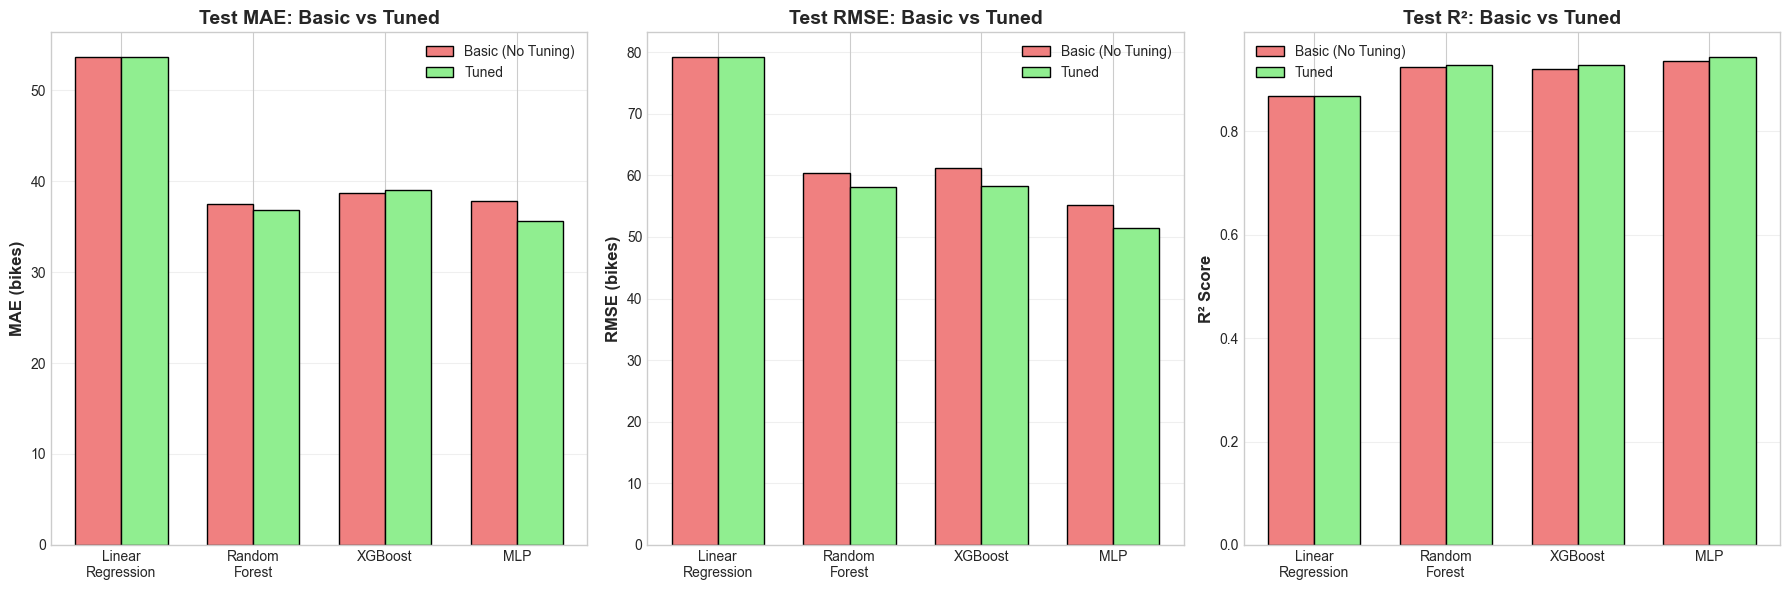

In [249]:
# Create bar chart comparing tuned vs basic models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = ['Linear\nRegression', 'Random\nForest', 'XGBoost', 'MLP']
basic_values = [test_mae_lr, test_mae_rf, test_mae_xgb, test_mae_mlp]
tuned_values = [test_mae_lr_tuned, test_mae_rf_tuned, test_mae_xgb_tuned, test_mae_mlp_tuned]

x = np.arange(len(models))
width = 0.35

# MAE Comparison
axes[0].bar(x - width/2, basic_values, width, label='Basic (No Tuning)', color='lightcoral', edgecolor='black')
axes[0].bar(x + width/2, tuned_values, width, label='Tuned', color='lightgreen', edgecolor='black')
axes[0].set_ylabel('MAE (bikes)', fontsize=12, fontweight='bold')
axes[0].set_title('Test MAE: Basic vs Tuned', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# RMSE Comparison
basic_rmse = [test_rmse_lr, test_rmse_rf, test_rmse_xgb, test_rmse_mlp]
tuned_rmse = [test_rmse_lr_tuned, test_rmse_rf_tuned, test_rmse_xgb_tuned, test_rmse_mlp_tuned]

axes[1].bar(x - width/2, basic_rmse, width, label='Basic (No Tuning)', color='lightcoral', edgecolor='black')
axes[1].bar(x + width/2, tuned_rmse, width, label='Tuned', color='lightgreen', edgecolor='black')
axes[1].set_ylabel('RMSE (bikes)', fontsize=12, fontweight='bold')
axes[1].set_title('Test RMSE: Basic vs Tuned', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# R² Comparison
basic_r2 = [test_r2_lr, test_r2_rf, test_r2_xgb, test_r2_mlp]
tuned_r2 = [test_r2_lr_tuned, test_r2_rf_tuned, test_r2_xgb_tuned, test_r2_mlp_tuned]

axes[2].bar(x - width/2, basic_r2, width, label='Basic (No Tuning)', color='lightcoral', edgecolor='black')
axes[2].bar(x + width/2, tuned_r2, width, label='Tuned', color='lightgreen', edgecolor='black')
axes[2].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[2].set_title('Test R²: Basic vs Tuned', fontsize=14, fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(models)
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plot_path = 'results/tuned_vs_basic_comparison.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"\n✓ Comparison plot saved to {plot_path}")
plt.show()

# 7. Impact of Feature Engineering (Models on Original Features Only)

This section evaluates all four models using ONLY the original 13 features from the raw dataset, without any engineered features (no lag variables, rolling statistics, cyclical encoding, or interaction terms). 


In [ ]:
# Reload original dataset
from sklearn.datasets import fetch_openml

bike_data = fetch_openml(data_id=42712, as_frame=True, parser='auto')
df_original = bike_data.frame.copy()
print(f"   ✓ Dataset loaded: {df_original.shape[0]} rows, {df_original.shape[1]} columns")

# Prepare features

# Convert boolean columns to integers
for col in df_original.columns:
    if df_original[col].dtype == 'object' or df_original[col].dtype == 'bool':
        if df_original[col].nunique() == 2:  # Binary column
            df_original[col] = df_original[col].astype(str).map({'True': 1, 'False': 0, 'true': 1, 'false': 0})
            if df_original[col].isna().any():  # If mapping didn't work, try direct conversion
                df_original[col] = pd.Categorical(df_original[col]).codes

# One-hot encode categorical variables
df_processed = pd.get_dummies(df_original, columns=['season', 'weather'], drop_first=False)

# Ensure all columns are numeric
for col in df_processed.columns:
    if df_processed[col].dtype == 'object' or df_processed[col].dtype == 'category':
        df_processed[col] = pd.Categorical(df_processed[col]).codes

# Create binary features
df_processed['is_weekend'] = (df_processed['weekday'] >= 5).astype(int)

# Cyclic encoding for hour and month
df_processed['hour_sin'] = np.sin(2 * np.pi * df_processed['hour'] / 24)
df_processed['hour_cos'] = np.cos(2 * np.pi * df_processed['hour'] / 24)
df_processed['month_sin'] = np.sin(2 * np.pi * (df_processed['month'] - 1) / 12)
df_processed['month_cos'] = np.cos(2 * np.pi * (df_processed['month'] - 1) / 12)

# Drop year column and separate features/target
df_processed = df_processed.drop(columns=['year'], errors='ignore')
y_original = df_processed['count'].copy()
X_original = df_processed.drop(columns=['count', 'casual', 'registered'], errors='ignore')

# Ensure all features are numeric
X_original = X_original.apply(pd.to_numeric, errors='coerce')

print(f"   ✓ Features after basic preprocessing: {X_original.shape[1]} columns")
print(f"   ✓ All columns are numeric: {X_original.select_dtypes(include=[np.number]).shape[1] == X_original.shape[1]}")

print(f"   ✓ Features after basic preprocessing: {X_original.shape[1]} columns")
print(f"   ✓ Features: {X_original.columns.tolist()}")

# Temporal split (70/30)
split_index = int(len(X_original) * 0.7)
X_train_orig = X_original.iloc[:split_index]
X_test_orig = X_original.iloc[split_index:]
y_train_orig = y_original.iloc[:split_index]
y_test_orig = y_original.iloc[split_index:]

print(f"   ✓ Training set: {X_train_orig.shape[0]} samples")
print(f"   ✓ Test set: {X_test_orig.shape[0]} samples")




[1/4] Loading original dataset...
   ✓ Dataset loaded: 17379 rows, 13 columns
   ✓ Features after basic preprocessing: 22 columns
   ✓ All columns are numeric: False
   ✓ Features after basic preprocessing: 22 columns
   ✓ Features: ['month', 'hour', 'holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'humidity', 'windspeed', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weather_clear', 'weather_heavy_rain', 'weather_misty', 'weather_rain', 'is_weekend', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
   ✓ Training set: 12165 samples
   ✓ Test set: 5214 samples


Linear regression

In [ ]:


# Create and train model
lr_original = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

print("\n[1/3] Training...")
lr_original.fit(X_train_orig, y_train_orig)
print("   ✓ Training complete")

# Predictions and metrics
y_pred_test_lr_orig = lr_original.predict(X_test_orig)

mae_lr_orig = mean_absolute_error(y_test_orig, y_pred_test_lr_orig)
rmse_lr_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_test_lr_orig))
r2_lr_orig = r2_score(y_test_orig, y_pred_test_lr_orig)

print("\n   Test Set Performance:")
print("   " + "=" * 60)
print(f"   MAE:  {mae_lr_orig:8.4f}")
print(f"   RMSE: {rmse_lr_orig:8.4f}")
print(f"   R²:   {r2_lr_orig:8.4f}")
print("   " + "=" * 60)

# Save metrics
metrics_lr_orig = {
    "model_type": "Linear Regression (Original Features Only)",
    "n_features": X_train_orig.shape[1],
    "test_metrics": {
        "mae": float(mae_lr_orig),
        "rmse": float(rmse_lr_orig),
        "r2": float(r2_lr_orig)
    }
}

with open('results/linear_original_features_metrics.json', 'w') as f:
    json.dump(metrics_lr_orig, f, indent=2)
print(f"   ✓ Metrics saved")


[1/3] Training...
   ✓ Training complete

[2/3] Evaluating...

   Test Set Performance:
   MAE:  121.7110
   RMSE: 188.3479
   R²:     0.2695

[3/3] Saving metrics...
   ✓ Metrics saved


Random Forrest 

In [ ]:
# Create and train model
rf_original = RandomForestRegressor(n_estimators=100, random_state=42)

rf_original.fit(X_train_orig, y_train_orig)

# Predictions and metrics
y_pred_test_rf_orig = rf_original.predict(X_test_orig)

mae_rf_orig = mean_absolute_error(y_test_orig, y_pred_test_rf_orig)
rmse_rf_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_test_rf_orig))
r2_rf_orig = r2_score(y_test_orig, y_pred_test_rf_orig)

print("\n   Test Set Performance:")
print(f"   MAE:  {mae_rf_orig:8.4f}")
print(f"   RMSE: {rmse_rf_orig:8.4f}")
print(f"   R²:   {r2_rf_orig:8.4f}")

# Save metrics
metrics_rf_orig = {
    "model_type": "Random Forest (Original Features Only)",
    "n_features": X_train_orig.shape[1],
    "test_metrics": {
        "mae": float(mae_rf_orig),
        "rmse": float(rmse_rf_orig),
        "r2": float(r2_rf_orig)
    }
}

with open('results/rf_original_features_metrics.json', 'w') as f:
    json.dump(metrics_rf_orig, f, indent=2)
print(f"   Metrics saved")

    Training complete

   Test Set Performance:
   MAE:   90.7006
   RMSE: 126.4675
   R²:     0.6707
   Metrics saved


XGBoost

In [253]:
# Create and train model
xgb_original = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

xgb_original.fit(X_train_orig, y_train_orig)

# Predictions and metrics
y_pred_test_xgb_orig = xgb_original.predict(X_test_orig)

mae_xgb_orig = mean_absolute_error(y_test_orig, y_pred_test_xgb_orig)
rmse_xgb_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_test_xgb_orig))
r2_xgb_orig = r2_score(y_test_orig, y_pred_test_xgb_orig)

print("\n   Test Set Performance:")
print(f"   MAE:  {mae_xgb_orig:8.4f}")
print(f"   RMSE: {rmse_xgb_orig:8.4f}")
print(f"   R²:   {r2_xgb_orig:8.4f}")

# Save metrics
metrics_xgb_orig = {
    "model_type": "XGBoost (Original Features Only)",
    "n_features": X_train_orig.shape[1],
    "test_metrics": {
        "mae": float(mae_xgb_orig),
        "rmse": float(rmse_xgb_orig),
        "r2": float(r2_xgb_orig)
    }
}

with open('results/xgb_original_features_metrics.json', 'w') as f:
    json.dump(metrics_xgb_orig, f, indent=2)
print(f"   Metrics saved")




   Test Set Performance:
   MAE:   91.5332
   RMSE: 126.2985
   R²:     0.6716
   Metrics saved


MLP 

In [254]:

# Create and train model
mlp_original = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100,), random_state=42, max_iter=500))
])

mlp_original.fit(X_train_orig, y_train_orig)
print(f"   ✓ Training complete (converged in {mlp_original.named_steps['mlp'].n_iter_} iterations)")

# Predictions and metrics
y_pred_test_mlp_orig = mlp_original.predict(X_test_orig)

mae_mlp_orig = mean_absolute_error(y_test_orig, y_pred_test_mlp_orig)
rmse_mlp_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_test_mlp_orig))
r2_mlp_orig = r2_score(y_test_orig, y_pred_test_mlp_orig)

print("\n   Test Set Performance:")
print(f"   MAE:  {mae_mlp_orig:8.4f}")
print(f"   RMSE: {rmse_mlp_orig:8.4f}")
print(f"   R²:   {r2_mlp_orig:8.4f}")

# Save metrics
metrics_mlp_orig = {
    "model_type": "MLP (Original Features Only)",
    "n_features": X_train_orig.shape[1],
    "test_metrics": {
        "mae": float(mae_mlp_orig),
        "rmse": float(rmse_mlp_orig),
        "r2": float(r2_mlp_orig)
    }
}

with open('results/mlp_original_features_metrics.json', 'w') as f:
    json.dump(metrics_mlp_orig, f, indent=2)
print(f"    Metrics saved")



   ✓ Training complete (converged in 500 iterations)

   Test Set Performance:
   MAE:   92.3512
   RMSE: 131.5248
   R²:     0.6438
    Metrics saved


COMPARING OG features vs Engineered features 

IMPACT OF FEATURE ENGINEERING


            Model  Original Features MAE  Engineered Features MAE  MAE Improvement  % Improvement
Linear Regression             121.711026                53.675446        68.035580      55.899274
    Random Forest              90.700582                36.872471        53.828111      59.347040
          XGBoost              91.533173                39.018560        52.514613      57.372219
              MLP              92.351156                35.580623        56.770533      61.472466


Feature Count Comparison:
  Original features: 22 features
  Engineered features: 40 features
  Additional features created: 18


✓ Impact visualization saved to results/feature_engineering_impact.png


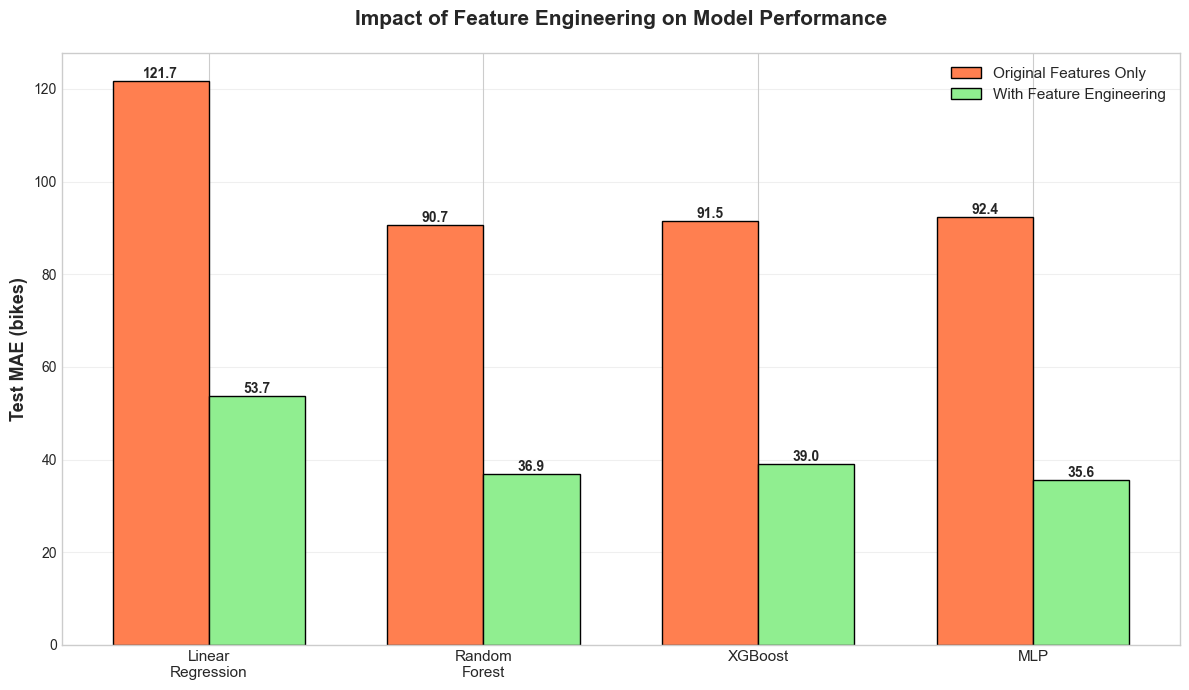

In [255]:
print("IMPACT OF FEATURE ENGINEERING")

# Create comparison table
comparison_fe = {
    'Model': [
        'Linear Regression',
        'Random Forest',
        'XGBoost',
        'MLP'
    ],
    'Original Features MAE': [
        mae_lr_orig,
        mae_rf_orig,
        mae_xgb_orig,
        mae_mlp_orig
    ],
    'Engineered Features MAE': [
        test_mae_lr_tuned,
        test_mae_rf_tuned,
        test_mae_xgb_tuned,
        test_mae_mlp_tuned
    ],
    'MAE Improvement': [
        mae_lr_orig - test_mae_lr_tuned,
        mae_rf_orig - test_mae_rf_tuned,
        mae_xgb_orig - test_mae_xgb_tuned,
        mae_mlp_orig - test_mae_mlp_tuned
    ],
    '% Improvement': [
        ((mae_lr_orig - test_mae_lr_tuned) / mae_lr_orig) * 100,
        ((mae_rf_orig - test_mae_rf_tuned) / mae_rf_orig) * 100,
        ((mae_xgb_orig - test_mae_xgb_tuned) / mae_xgb_orig) * 100,
        ((mae_mlp_orig - test_mae_mlp_tuned) / mae_mlp_orig) * 100
    ]
}

comparison_fe_df = pd.DataFrame(comparison_fe)

print("\n")
print(comparison_fe_df.to_string(index=False))
print("\n" + "=" * 80)

print(f"\nFeature Count Comparison:")
print(f"  Original features: {X_train_orig.shape[1]} features")
print(f"  Engineered features: {X_train.shape[1]} features")
print(f"  Additional features created: {X_train.shape[1] - X_train_orig.shape[1]}")
print("\n" + "=" * 80)

# Visualization
fig, ax = plt.subplots(figsize=(12, 7))

models = ['Linear\nRegression', 'Random\nForest', 'XGBoost', 'MLP']
original_mae = [mae_lr_orig, mae_rf_orig, mae_xgb_orig, mae_mlp_orig]
engineered_mae = [test_mae_lr_tuned, test_mae_rf_tuned, test_mae_xgb_tuned, test_mae_mlp_tuned]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, original_mae, width, label='Original Features Only', 
               color='coral', edgecolor='black')
bars2 = ax.bar(x + width/2, engineered_mae, width, label='With Feature Engineering', 
               color='lightgreen', edgecolor='black')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Test MAE (bikes)', fontsize=13, fontweight='bold')
ax.set_title('Impact of Feature Engineering on Model Performance', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plot_path = 'results/feature_engineering_impact.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"\n✓ Impact visualization saved to {plot_path}")
plt.show()